## Konfiguration und Szenariodefinition


In [207]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import json

# Add the utils directory to the Python path to import the Scenario class
# This assumes the notebook is in postprocessing/notebooks/ and scenario_data.py is in postprocessing/utils/
module_path = os.path.abspath(os.path.join("..", "utils"))
if (module_path not in sys.path):
    sys.path.append(module_path)

try:
    from scenario_data import Scenario
except ImportError as e:
    print(f"Error importing Scenario class: {e}")
    print("Please ensure 'scenario_data.py' is in the 'postprocessing/utils' directory and the path is correct.")

plt.style.use('dark_background')


In [208]:
def load_color_dict(json_path):
    """Lädt das Farbdictionary aus einer JSON-Datei."""
    with open(json_path, "r", encoding="utf-8") as f:
        color_dict = json.load(f)
    # Listen zu Tupeln konvertieren (matplotlib erwartet Tupel)
    return {k: tuple(v) for k, v in color_dict.items()}

def get_color_for_key(key, color_dict, default=(0.5, 0.5, 0.5, 1.0)):
    """Gibt die Farbe für einen Key zurück, sonst Default."""
    return color_dict.get(key, default)

# Farben einmalig laden (Pfad ggf. anpassen)
COLOR_DICT = load_color_dict("../utils/assigned_colors_SR.json")

In [209]:
# Define the base path to the simulation output data directory
# This notebook is in postprocessing/notebooks/, so data/output/ is ../../data/output/
BASE_DATA_PATH = os.path.abspath(os.path.join("..", "..", "data", "output"))

print(f"Basispfad für Daten: {BASE_DATA_PATH}")
if not os.path.exists(BASE_DATA_PATH):
    print(f"WARNUNG: Der Basispfad {BASE_DATA_PATH} existiert nicht. Bitte überprüfen Sie den Pfad.")

# Define scenarios for analysis
# Use Case 1: Standard CO2 price
# Scenario 1: uc1, 2030, 0% H2
try:
    scenario_uc1_0h2 = Scenario(
        base_data_path=BASE_DATA_PATH,
        use_case="uc1",
        year=2030,
        h2_pct=0,
        co2_multiplier=False 
    )
    print(f"Szenario 1 geladen: {scenario_uc1_0h2}")

    # Scenario 2: uc1, 2030, 100% H2
    scenario_uc1_100h2 = Scenario(
        base_data_path=BASE_DATA_PATH,
        use_case="uc1",
        year=2030,
        h2_pct=100,
        co2_multiplier=False
    )
    print(f"Szenario 2 geladen: {scenario_uc1_100h2}")

except FileNotFoundError as e:
    print(f"Fehler beim Initialisieren eines Szenarios: {e}")
    print("Stellen Sie sicher, dass die Datenverzeichnisse und Dateien für die angegebenen Szenarien existieren.")
except ValueError as e:
    print(f"Fehler bei den Szenarioparametern: {e}")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")


Basispfad für Daten: c:\Users\wlhlm\VSCodeProjects\burn4h2\data\output
Szenario 1 geladen: <Scenario: uc1_2030_0h2 ( use_case='uc1', year=2030, h2_pct=0, co2_multiplier=False)>
Szenario 2 geladen: <Scenario: uc1_2030_100h2 ( use_case='uc1', year=2030, h2_pct=100, co2_multiplier=False)>


In [210]:
# Load data for the scenarios
try:
    data_uc1_0h2_output = scenario_uc1_0h2.load_output_data()
    costs_uc1_0h2 = scenario_uc1_0h2.load_costs_data()
    metadata_uc1_0h2 = scenario_uc1_0h2.load_metadata()
    chp_asset_data_uc1_0h2 = scenario_uc1_0h2.load_chp_asset_data() # New line
    print(f"Daten für {scenario_uc1_0h2.scenario_name_identifier} geladen.")
    print("Output Daten (erste 5 Zeilen):")
    print(data_uc1_0h2_output.head())
    if chp_asset_data_uc1_0h2 is not None: # New block
        print("\nCHP Asset Daten (uc1_0h2):")
        print(chp_asset_data_uc1_0h2)

    data_uc1_100h2_output = scenario_uc1_100h2.load_output_data()
    costs_uc1_100h2 = scenario_uc1_100h2.load_costs_data()
    metadata_uc1_100h2 = scenario_uc1_100h2.load_metadata()
    chp_asset_data_uc1_100h2 = scenario_uc1_100h2.load_chp_asset_data() # New line
    print(f"\nDaten für {scenario_uc1_100h2.scenario_name_identifier} geladen.")
    print("Output Daten (erste 5 Zeilen):")
    print(data_uc1_100h2_output.head())
    if chp_asset_data_uc1_100h2 is not None: # New block
        print("\nCHP Asset Daten (uc1_100h2):")
        print(chp_asset_data_uc1_100h2)

except NameError:
    print("Fehler: Szenario-Objekte wurden aufgrund eines vorherigen Fehlers nicht erstellt.")
except FileNotFoundError as e:
    print(f"Fehler beim Laden der Daten: {e}")
except Exception as e:
    print(f"Ein unerwarteter Fehler beim Laden der Daten ist aufgetreten: {e}")


Jahr 2030 aus Metadaten ('config': 'uc1_2030_0h2.json') für Datetime-Index extrahiert.
Erstelle Zeitstempel für uc1_2030_0h2, Jahr 2030 (Normales Jahr).
Datetime-Index für uc1_2030_0h2 gesetzt.
Daten für uc1_2030_0h2 geladen.
Output Daten (erste 5 Zeilen):
                     t  gas_price  power_price  hydrogen_price  heat_demand  \
datetime                                                                      
2030-01-01 00:00:00  1     23.693        75.01      186.656315      96.5540   
2030-01-01 01:00:00  2     23.693        85.88      186.656315      97.6990   
2030-01-01 02:00:00  3     23.693        74.00      186.656315      95.3175   
2030-01-01 03:00:00  4     23.693        74.00      186.656315      95.7440   
2030-01-01 04:00:00  5     23.693        74.00      186.656315      94.0390   

                     local_heat_demand  supply_temperature  \
datetime                                                     
2030-01-01 00:00:00           1.322578                80.0   
203

## Critical Spark Spread

### Berechnung des Critical Spark Spread


In [211]:
def calculate_critical_spark_spread(scenario: Scenario): # Geänderte Signatur
    """
    Berechnet den Critical Spark Spread als Zeitreihe basierend auf einem Szenario-Objekt.
    Args:
        scenario (Scenario): Das Szenario-Objekt, das alle notwendigen Daten und Metadaten enthält.
    """
    
    # Daten aus dem Szenario-Objekt laden
    output_data = scenario.load_output_data()
    metadata = scenario.load_metadata()
    chp_asset_data = scenario.load_chp_asset_data()

    if chp_asset_data is None:
        raise ValueError(f"CHP Asset Daten konnten nicht für Szenario {scenario.scenario_name_identifier} geladen werden (H2-Anteil: {scenario.h2_pct}%). Überprüfen Sie die Konfiguration in scenario_data.py und das Vorhandensein der CSV-Datei.")

    # --- Bestehende Logik aus Ihrer Zelle, angepasst an die neuen Datenquellen ---
    electricity_price_col = 'power_price' # Ihre Spaltenbezeichnung
    gas_price_col = 'gas_price'           # Ihre Spaltenbezeichnung
    h2_price_col = 'hydrogen_price'       # Ihre Spaltenbezeichnung
    
    # Preise und Parameter aus Metadaten und Output-Daten
    co2_price = metadata['CO2_PRICE']
    power_price = output_data[electricity_price_col]
    gas_price = output_data[gas_price_col]
    h2_price = output_data[h2_price_col]
    
    # H2-Beimischung aus Metadaten
    # Es wird angenommen, dass metadata['hydrogen_admixture']['chp_1'] den H2-Anteil als Bruchteil (0-1) enthält
    h2_admixture_meta_fraction = metadata['hydrogen_admixture']['chp_1']
    h2_admixture_meta_percent = h2_admixture_meta_fraction * 100

    # Konsistenzprüfung mit dem h2_pct des Szenario-Objekts
    if int(round(h2_admixture_meta_percent)) != scenario.h2_pct:
        print(f"WARNUNG für Szenario {scenario.scenario_name_identifier}: H2-Anteil aus Metadaten ({h2_admixture_meta_percent:.2f}%) unterscheidet sich vom Szenario-Parameter ({scenario.h2_pct}%). Verwende Wert aus Metadaten für die Berechnung.")
    
    # Volumenverhältnisse (0-1 Skala), basierend auf Metadaten
    vol_h2 = h2_admixture_meta_fraction 
    vol_ng = 1 - vol_h2
    
    # Energiedichten [MJ/m³] (Ihre Werte)
    HV_H2 = 120.0 
    HV_NG = 47.0   
    RHO_H2 = 0.09  
    RHO_NG = 0.68  
    
    energy_density_h2 = RHO_H2 * HV_H2
    energy_density_ng = RHO_NG * HV_NG
    
    # Energiefraktionen berechnen
    # Vermeide Division durch Null, falls beide Energiedichten 0 sind (unwahrscheinlich)
    denominator = (vol_h2 * energy_density_h2 + vol_ng * energy_density_ng)
    if denominator == 0:
        energy_fraction_h2 = 0 if vol_h2 == 0 else 1 # Vereinfachung, wenn nur ein Brennstoff vorhanden ist und der andere 0 Dichte hat
        energy_fraction_ng = 0 if vol_ng == 0 else 1
        if vol_h2 > 0 and vol_ng > 0: # Beide vorhanden, aber Nenner 0 -> Problem
             raise ValueError("Gesamtenergiedichte ist Null, Energiefraktionen können nicht berechnet werden.")
    else:
        energy_fraction_h2 = (vol_h2 * energy_density_h2) / denominator
        energy_fraction_ng = (vol_ng * energy_density_ng) / denominator

    # CHP Asset Daten
    max_power = chp_asset_data.loc['max', 'power'] 
    min_power = chp_asset_data.loc['min', 'power']
    max_gas = chp_asset_data.loc['max', 'gas']
    min_gas = chp_asset_data.loc['min', 'gas']
    max_co2_asset = chp_asset_data.loc['max', 'co2'] # Umbenannt, um Konflikt mit co2_price zu vermeiden
    min_co2_asset = chp_asset_data.loc['min', 'co2']

    results_df = pd.DataFrame(index=output_data.index) # Index von output_data übernehmen
    results_df['power_price'] = power_price
    results_df['gas_price'] = gas_price
    results_df['hydrogen_price'] = h2_price
    results_df['co2_price_scalar'] = co2_price # CO2-Preis als Skalar für die Berechnung

    # Brennstoffkosten
    results_df['max_ngas_costs'] = max_gas * energy_fraction_ng * gas_price
    results_df['max_h2_costs'] = max_gas * energy_fraction_h2 * h2_price
    results_df['max_fuel_costs'] = results_df['max_ngas_costs'] + results_df['max_h2_costs']

    results_df['min_ngas_costs'] = min_gas * energy_fraction_ng * gas_price
    results_df['min_h2_costs'] = min_gas * energy_fraction_h2 * h2_price
    results_df['min_fuel_costs'] = results_df['min_ngas_costs'] + results_df['min_h2_costs']

    # CO2-Kosten (basierend auf dem Erdgasanteil der CO2-Emissionen aus den Asset-Daten)
    # Annahme: Die 'co2'-Spalte in chp_asset_data bezieht sich auf Emissionen bei 100% Erdgasbetrieb.
    # Diese Emissionen werden dann mit dem Erdgas-Volumenanteil skaliert.
    min_co2_emissions_adjusted = min_co2_asset * vol_ng # CO2-Emissionen skaliert mit Erdgas-Volumenanteil
    max_co2_emissions_adjusted = max_co2_asset * vol_ng # CO2-Emissionen skaliert mit Erdgas-Volumenanteil
    
    min_co2_costs = min_co2_emissions_adjusted * co2_price
    max_co2_costs = max_co2_emissions_adjusted * co2_price

    results_df['max_total_costs_generation'] = results_df['max_fuel_costs'] + max_co2_costs
    results_df['min_total_costs_generation'] = results_df['min_fuel_costs'] + min_co2_costs

    # Zusätzliche Kosten und Leistung
    results_df['additional_costs_generation'] = results_df['max_total_costs_generation'] - results_df['min_total_costs_generation']
    # Sicherstellen, dass additional_power nicht Null ist, um Division durch Null zu vermeiden
    additional_power_val = max_power - min_power
    if additional_power_val == 0:
        # Fall behandeln, in dem min_power und max_power gleich sind (z.B. keine Modulation)
        # CSS ist in diesem Fall nicht definiert oder könnte als unendlich/Null interpretiert werden.
        # Hier wird NaN zurückgegeben.
        print(f"WARNUNG für Szenario {scenario.scenario_name_identifier}: Maximale und minimale Leistung sind gleich ({max_power}). CSS kann nicht berechnet werden (Division durch Null).")
        results_df['critical_spark_spread_EUR_per_MWh'] = pd.NA
    else:
        results_df['critical_spark_spread_EUR_per_MWh'] = results_df['additional_costs_generation'] / additional_power_val
    
    results_df['additional_power'] = additional_power_val


    print(f"CSS Berechnung für {scenario.scenario_name_identifier} abgeschlossen. Erste 5 Zeilen der Ergebnisse:")
    print(results_df[['power_price', 'max_fuel_costs', 'max_total_costs_generation', 'critical_spark_spread_EUR_per_MWh']].head())

    return results_df  

In [212]:
# Berechne CSS für beide Szenarien

print("Starte CSS-Berechnung für Szenario uc1_0h2...")
css_results_uc1_0h2 = calculate_critical_spark_spread(scenario_uc1_0h2)
print("CSS-Berechnung für Szenario uc1_0h2 abgeschlossen.\n")

print("Starte CSS-Berechnung für Szenario uc1_100h2...")
css_results_uc1_100h2 = calculate_critical_spark_spread(scenario_uc1_100h2)
print("CSS-Berechnung für Szenario uc1_100h2 abgeschlossen.\n")


Starte CSS-Berechnung für Szenario uc1_0h2...
CSS Berechnung für uc1_2030_0h2 abgeschlossen. Erste 5 Zeilen der Ergebnisse:
                     power_price  max_fuel_costs  max_total_costs_generation  \
datetime                                                                       
2030-01-01 00:00:00        75.01     3703.879304                 7644.379304   
2030-01-01 01:00:00        85.88     3703.879304                 7644.379304   
2030-01-01 02:00:00        74.00     3703.879304                 7644.379304   
2030-01-01 03:00:00        74.00     3703.879304                 7644.379304   
2030-01-01 04:00:00        74.00     3703.879304                 7644.379304   

                     critical_spark_spread_EUR_per_MWh  
datetime                                                
2030-01-01 00:00:00                          91.215572  
2030-01-01 01:00:00                          91.215572  
2030-01-01 02:00:00                          91.215572  
2030-01-01 03:00:00           

### Visualisierung des Critical Spark Spread

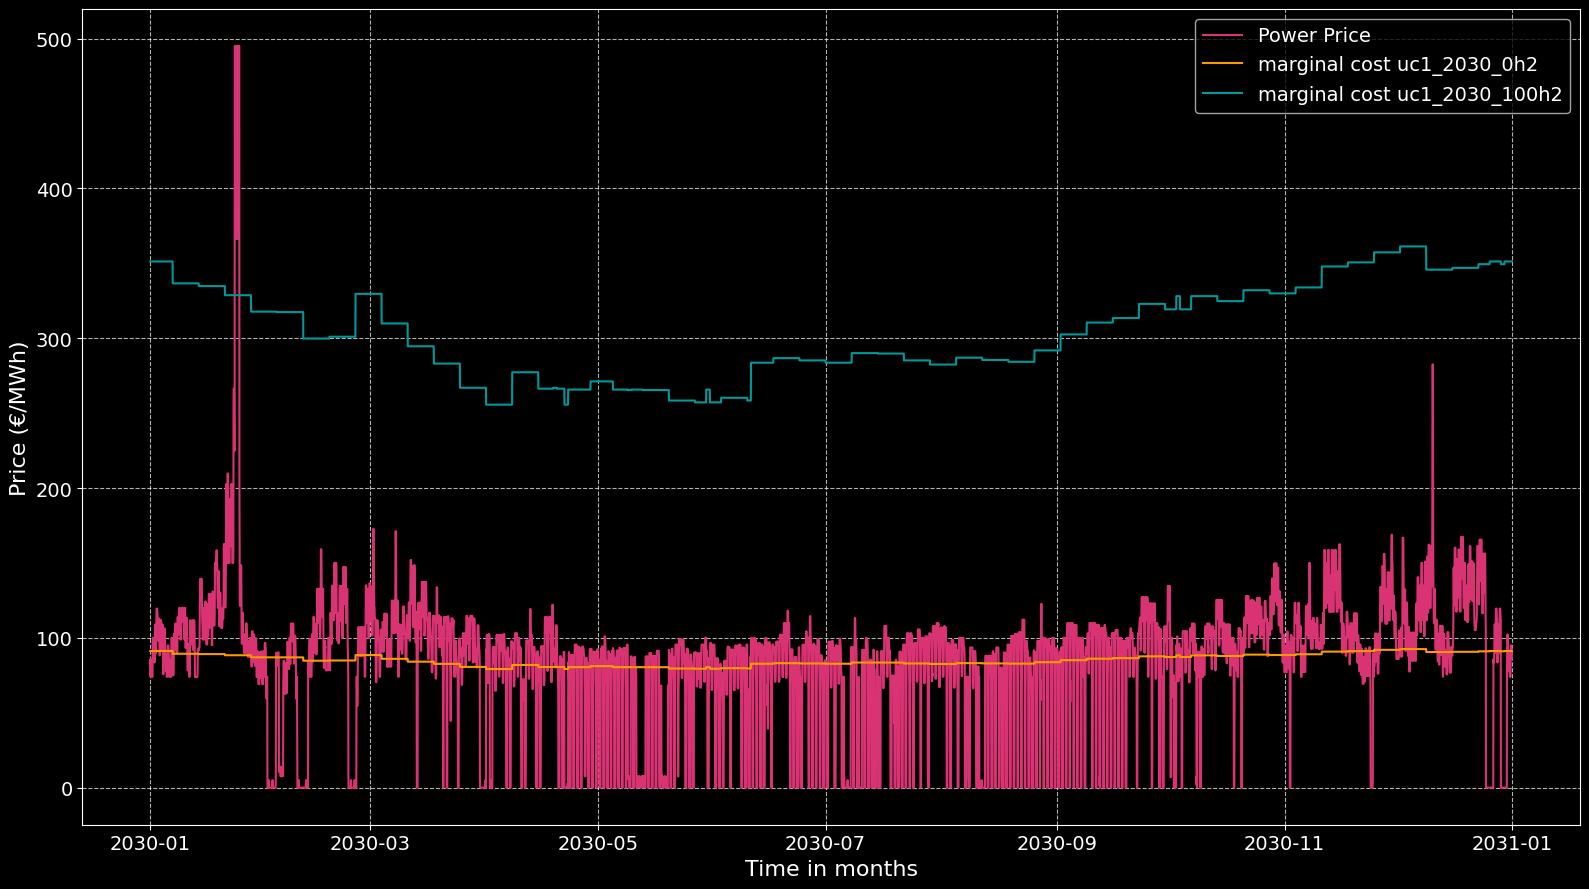

In [213]:
fig, ax = plt.subplots(figsize=(16, 9)) # ratio 16:9

# MANUELLE Farbcodes für die Linien
color_power_price = COLOR_DICT.get('power_price', 'green')
color_css_0h2 = COLOR_DICT.get('css_0h2', 'blue')
color_css_100h2 = COLOR_DICT.get('css_100h2', 'red')

ax.plot(css_results_uc1_0h2.index, 
        css_results_uc1_0h2['power_price'], 
        label=f'Power Price', 
        color=color_power_price,
        linewidth=1.5)

# Plot for 0% H2
ax.plot(css_results_uc1_0h2.index, 
        css_results_uc1_0h2['critical_spark_spread_EUR_per_MWh'], 
        label=f'marginal cost {scenario_uc1_0h2.scenario_name_identifier}', 
        color=color_css_0h2, 
        linewidth=1.5)

# Plot for 100% H2
ax.plot(css_results_uc1_100h2.index, 
        css_results_uc1_100h2['critical_spark_spread_EUR_per_MWh'], 
        label=f'marginal cost {scenario_uc1_100h2.scenario_name_identifier}', 
        color=color_css_100h2, 
        linewidth=1.5)


# ax.set_title('Vergleich Grenzkosten für UC1 2030', fontsize=16)
ax.set_xlabel('Time in months', fontsize=16)
ax.set_ylabel('Price (€/MWh)', fontsize=16)
ax.legend(fontsize=14) 
ax.tick_params(axis='both', which='major', labelsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Apply tight layout

plt.show() 

# To save with specific DPI:
# fig.savefig("critical_spark_spread_vergleich.png", dpi=600)

## Nahwärme Auswertung

Zusammenfassung der Nahwärme-Kennzahlen:
                                 uc1_2030_0h2  uc1_2030_100h2
Metrik                                                       
Abwärme Total eingespeist (MWh)  11773.866861    18674.099705
Genutzte Abwärme (MWh)            2433.808967     4802.197108
Relative Nutzung (%)                20.671280       25.715816
Rückkühlung/Verlust (MWh)         9340.057894    13871.902597




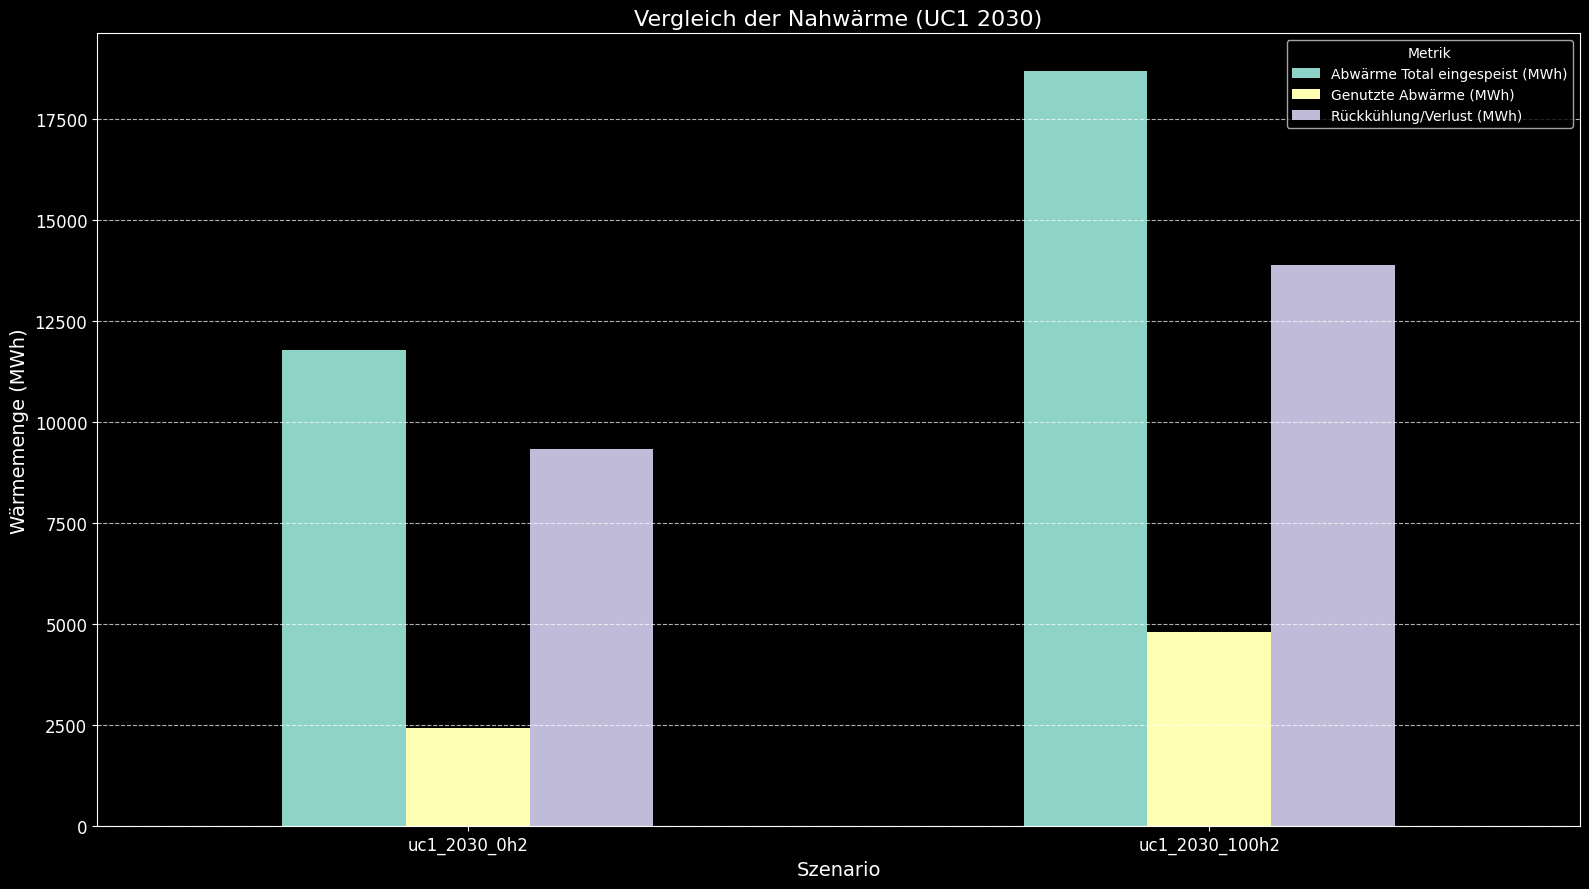

Monatliche Summen der Abwärme Dissipation (0% H2):
datetime
2030-01-31    1012.856259
2030-02-28    1095.933940
2030-03-31    1065.705378
2030-04-30     892.759912
2030-05-31     656.677656
2030-06-30     511.532885
2030-07-31     490.597413
2030-08-31     474.757744
2030-09-30     630.309908
2030-10-31     847.467153
2030-11-30     740.500465
2030-12-31     920.959183
Freq: ME, Name: waste_heat_grid.heat_dissipation, dtype: float64

Monatliche Summen der Abwärme Dissipation (100% H2):
datetime
2030-01-31    1208.360813
2030-02-28    1426.982812
2030-03-31    1645.060197
2030-04-30    1425.930141
2030-05-31    1052.196223
2030-06-30     879.932024
2030-07-31     842.337739
2030-08-31     849.099579
2030-09-30     897.318837
2030-10-31    1377.640809
2030-11-30    1067.321883
2030-12-31    1199.721540
Freq: ME, Name: waste_heat_grid.heat_dissipation, dtype: float64


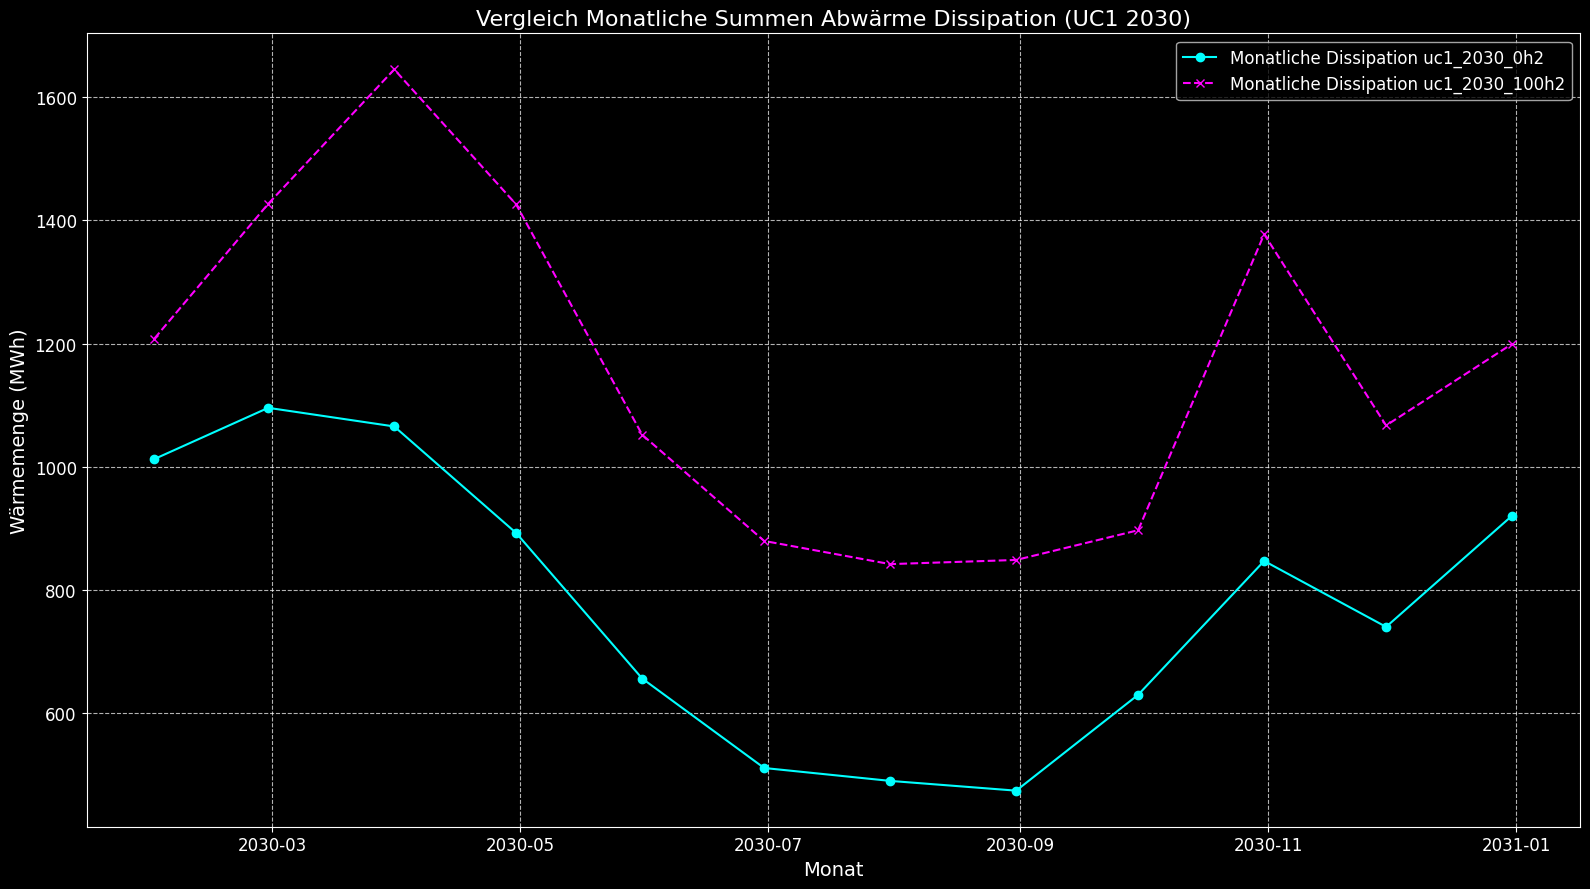

In [214]:
# Nahwärme-Kennzahlen
try:
    output_0h2 = scenario_uc1_0h2.load_output_data()
    output_100h2 = scenario_uc1_100h2.load_output_data()

    # Kennzahlen für Szenario 0% H2 berechnen
    feedin_0h2 = output_0h2['waste_heat_grid.heat_feedin'].sum()
    supply_0h2 = output_0h2['waste_heat_grid.heat_supply'].sum()
    dissipation_0h2 = output_0h2['waste_heat_grid.heat_dissipation'].sum()
    utilization_0h2 = (supply_0h2 / feedin_0h2) * 100 if feedin_0h2 != 0 else 0

    # Kennzahlen für Szenario 100% H2 berechnen
    feedin_100h2 = output_100h2['waste_heat_grid.heat_feedin'].sum()
    supply_100h2 = output_100h2['waste_heat_grid.heat_supply'].sum()
    dissipation_100h2 = output_100h2['waste_heat_grid.heat_dissipation'].sum()
    utilization_100h2 = (supply_100h2 / feedin_100h2) * 100 if feedin_100h2 != 0 else 0

    # Zusammenfassende Tabelle erstellen
    summary_data = {
        'Metrik': [
            'Abwärme Total eingespeist (MWh)', 
            'Genutzte Abwärme (MWh)', 
            'Relative Nutzung (%)', 
            'Rückkühlung/Verlust (MWh)'
        ],
        scenario_uc1_0h2.scenario_name_identifier: [
            feedin_0h2, 
            supply_0h2, 
            utilization_0h2, 
            dissipation_0h2
        ],
        scenario_uc1_100h2.scenario_name_identifier: [
            feedin_100h2, 
            supply_100h2, 
            utilization_100h2, 
            dissipation_100h2
        ]
    }
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.set_index('Metrik')

    print("Zusammenfassung der Nahwärme-Kennzahlen:")
    print(summary_df)
    print("\n==========================================\n")

    # Vergleichendes Balkendiagramm für die Summen
    metrics_to_plot = ['Abwärme Total eingespeist (MWh)', 'Genutzte Abwärme (MWh)', 'Rückkühlung/Verlust (MWh)']
    plot_df = summary_df.loc[metrics_to_plot].transpose() # Transponieren für einfaches Plotten

    fig, ax = plt.subplots(figsize=(16,9))
    plot_df.plot(kind='bar', ax=ax)
    
    ax.set_title('Vergleich der Nahwärme (UC1 2030)', fontsize=16)
    ax.set_ylabel('Wärmemenge (MWh)', fontsize=14)
    ax.set_xlabel('Szenario', fontsize=14)
    ax.tick_params(axis='x', rotation=0, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(title='Metrik', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ein Fehler ist in der Nahwärme-Auswertung aufgetreten: {e}")


# Optional: Vergleichender Zeitreihenplot für Abwärme Dissipation, falls gewünscht

# Monatliche Summen für Szenario 0% H2 berechnen
monthly_sum_0h2 = output_0h2['waste_heat_grid.heat_dissipation'].resample('ME').sum()

type(monthly_sum_0h2)

# Monatliche Summen für Szenario 100% H2 berechnen
monthly_sum_100h2 = output_100h2['waste_heat_grid.heat_dissipation'].resample('ME').sum()

print("Monatliche Summen der Abwärme Dissipation (0% H2):")
print(monthly_sum_0h2)
print("\nMonatliche Summen der Abwärme Dissipation (100% H2):")
print(monthly_sum_100h2)


# Plot für die monatlichen Summen der Abwärme Dissipation
fig_monthly_sum, ax_monthly_sum = plt.subplots(figsize=(16, 9))

ax_monthly_sum.plot(monthly_sum_0h2.index, 
                    monthly_sum_0h2, 
                    label=f'Monatliche Dissipation {scenario_uc1_0h2.scenario_name_identifier}', 
                    color='cyan', 
                    marker='o', 
                    linestyle='-')
ax_monthly_sum.plot(monthly_sum_100h2.index, 
                    monthly_sum_100h2, 
                    label=f'Monatliche Dissipation {scenario_uc1_100h2.scenario_name_identifier}', 
                    color='magenta', 
                    marker='x', 
                    linestyle='--')

ax_monthly_sum.set_title('Vergleich Monatliche Summen Abwärme Dissipation (UC1 2030)', fontsize=16)
ax_monthly_sum.set_xlabel('Monat', fontsize=14)
ax_monthly_sum.set_ylabel('Wärmemenge (MWh)', fontsize=14)
ax_monthly_sum.legend(fontsize=12)
ax_monthly_sum.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




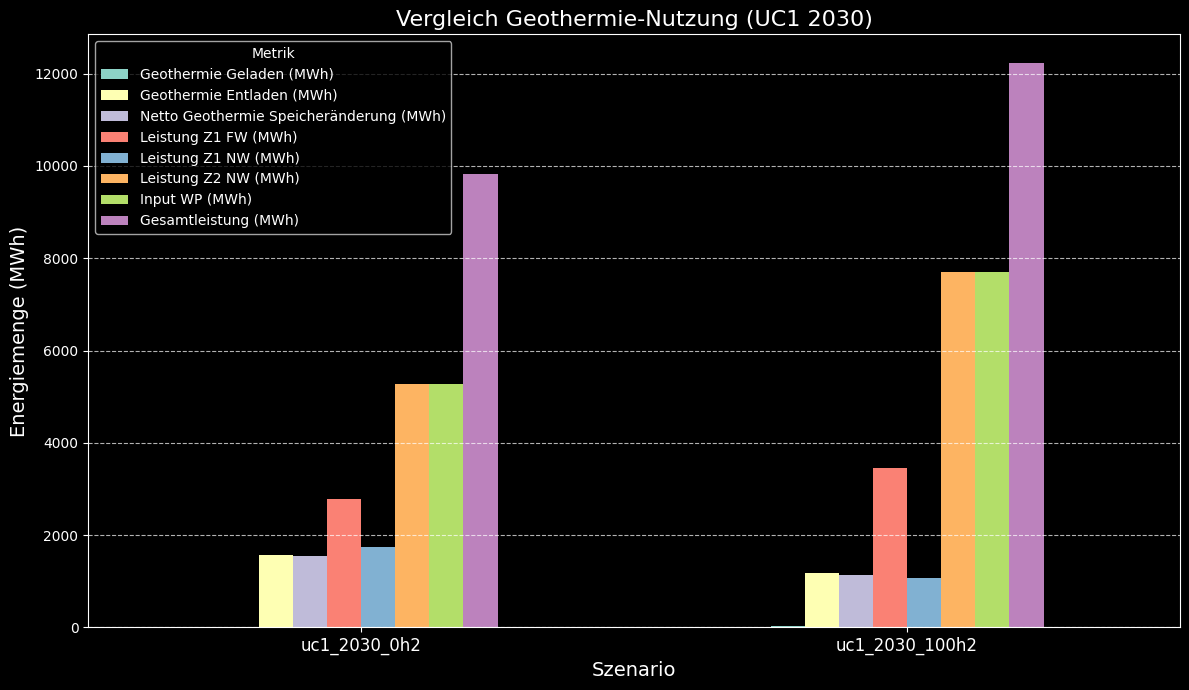

In [215]:
## Nahwörme-Erzeuger Auswertung
def local_heat_producer_analysis(df , scenario_name, start_date, end_date):
    """
    Analysiert die lokalen Wärmeerzeuger und gibt eine Zusammenfassung der wichtigsten Kennzahlen zurück.
    Args:
        data (DataFrame): Die Daten für das Szenario.
        scenario_name (str): Der Name des Szenarios.
    Returns:
        DataFrame: Eine Zusammenfassung der wichtigsten Kennzahlen.
    """
    # Filtere die Daten für den angegebenen Zeitraum
    df_filtered = df[start_date:end_date]

    geothermal_in = df_filtered['geo_heat_storage.heat_charging']
    geothermal_out = df_filtered['geo_heat_storage.heat_discharging']
    # power_price = df_filtered['power_price']#
    storage_Q_dot_Z1_FW = df_filtered['stratified_storage.Q_dot_Z1_FW']
    storage_Q_dot_Z1_NW = df_filtered['stratified_storage.Q_dot_Z1_NW']
    storage_Q_dot_Z2_NW = df_filtered['stratified_storage.Q_dot_Z2_NW']
    storage_WP_in = df_filtered['stratified_storage.Q_dot_WP']

        # Berechne die Gesamtenergiemengen
    total_geothermal_charged = geothermal_in.sum()
    total_geothermal_discharged = geothermal_out.sum()
    total_storage_Q_dot_Z1_FW = storage_Q_dot_Z1_FW.sum()
    total_storage_Q_dot_Z1_NW = storage_Q_dot_Z1_NW.sum()
    total_storage_Q_dot_Z2_NW = storage_Q_dot_Z2_NW.sum()
    input_wp = storage_WP_in.sum()

    # Berechne die Gesamtleistung
    total_storage_out = total_storage_Q_dot_Z1_FW + total_storage_Q_dot_Z1_NW + total_storage_Q_dot_Z2_NW
    net_geothermal_storage_change = total_geothermal_discharged - total_geothermal_charged

    metrics = {
        'Geothermie Geladen (MWh)': total_geothermal_charged,
        'Geothermie Entladen (MWh)': total_geothermal_discharged,
        'Netto Geothermie Speicheränderung (MWh)': net_geothermal_storage_change,
        'Leistung Z1 FW (MWh)': total_storage_Q_dot_Z1_FW,
        'Leistung Z1 NW (MWh)': total_storage_Q_dot_Z1_NW,
        'Leistung Z2 NW (MWh)': total_storage_Q_dot_Z2_NW,
        'Input WP (MWh)': input_wp, 
        'Gesamtleistung (MWh)': total_storage_out
    }
    # Berechne die Gesamtleistung und Gesamtkosten
    return pd.Series(metrics, name=scenario_name)



# Analyse für beide Szenarien durchführen

data_uc1_0h2 = scenario_uc1_0h2.load_output_data()
data_uc1_100h2 = scenario_uc1_100h2.load_output_data()

# start_date = '2030-01-01'
# end_date = '2030-01-30'

start_date = data_uc1_0h2.index.min()
end_date = data_uc1_0h2.index.max()

analysis_geo_0h2 = local_heat_producer_analysis(data_uc1_0h2, scenario_uc1_0h2.scenario_name_identifier, start_date, end_date)
analysis_geo_100h2 = local_heat_producer_analysis(data_uc1_100h2, scenario_uc1_100h2.scenario_name_identifier, start_date, end_date)



summary_geo_df = pd.DataFrame([analysis_geo_0h2, analysis_geo_100h2])


# Balkendiagramm für die Geothermie-Kennzahlen
fig_geo_summary, ax_geo_summary = plt.subplots(figsize=(12, 7))
summary_geo_df.plot(kind='bar', ax=ax_geo_summary)
ax_geo_summary.set_title('Vergleich Geothermie-Nutzung (UC1 2030)', fontsize=16)
ax_geo_summary.set_ylabel('Energiemenge (MWh)', fontsize=14)
ax_geo_summary.set_xlabel('Szenario', fontsize=14)
ax_geo_summary.tick_params(axis='x', rotation=0, labelsize=12)
ax_geo_summary.legend(title='Metrik', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()

plt.show()




Brutto-Wärmeerzeugung für 2030-05-02 (uc1_2030_0h2):
                     CHP 1 Abwärme  CHP 2 Abwärme  Solarthermie  Geothermie  \
datetime                                                                      
2030-05-02 00:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 01:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 02:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 03:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 04:00:00            1.9            1.9      0.027938        0.00   
2030-05-02 05:00:00            1.9            1.9      0.328107        0.00   
2030-05-02 06:00:00            1.9            1.9      1.157811        0.00   
2030-05-02 07:00:00            1.9            1.9      1.129987        0.00   
2030-05-02 08:00:00            0.0            0.0      1.116059        0.00   
2030-05-02 09:00:00            0.0            0.0      1.522111        0.85  

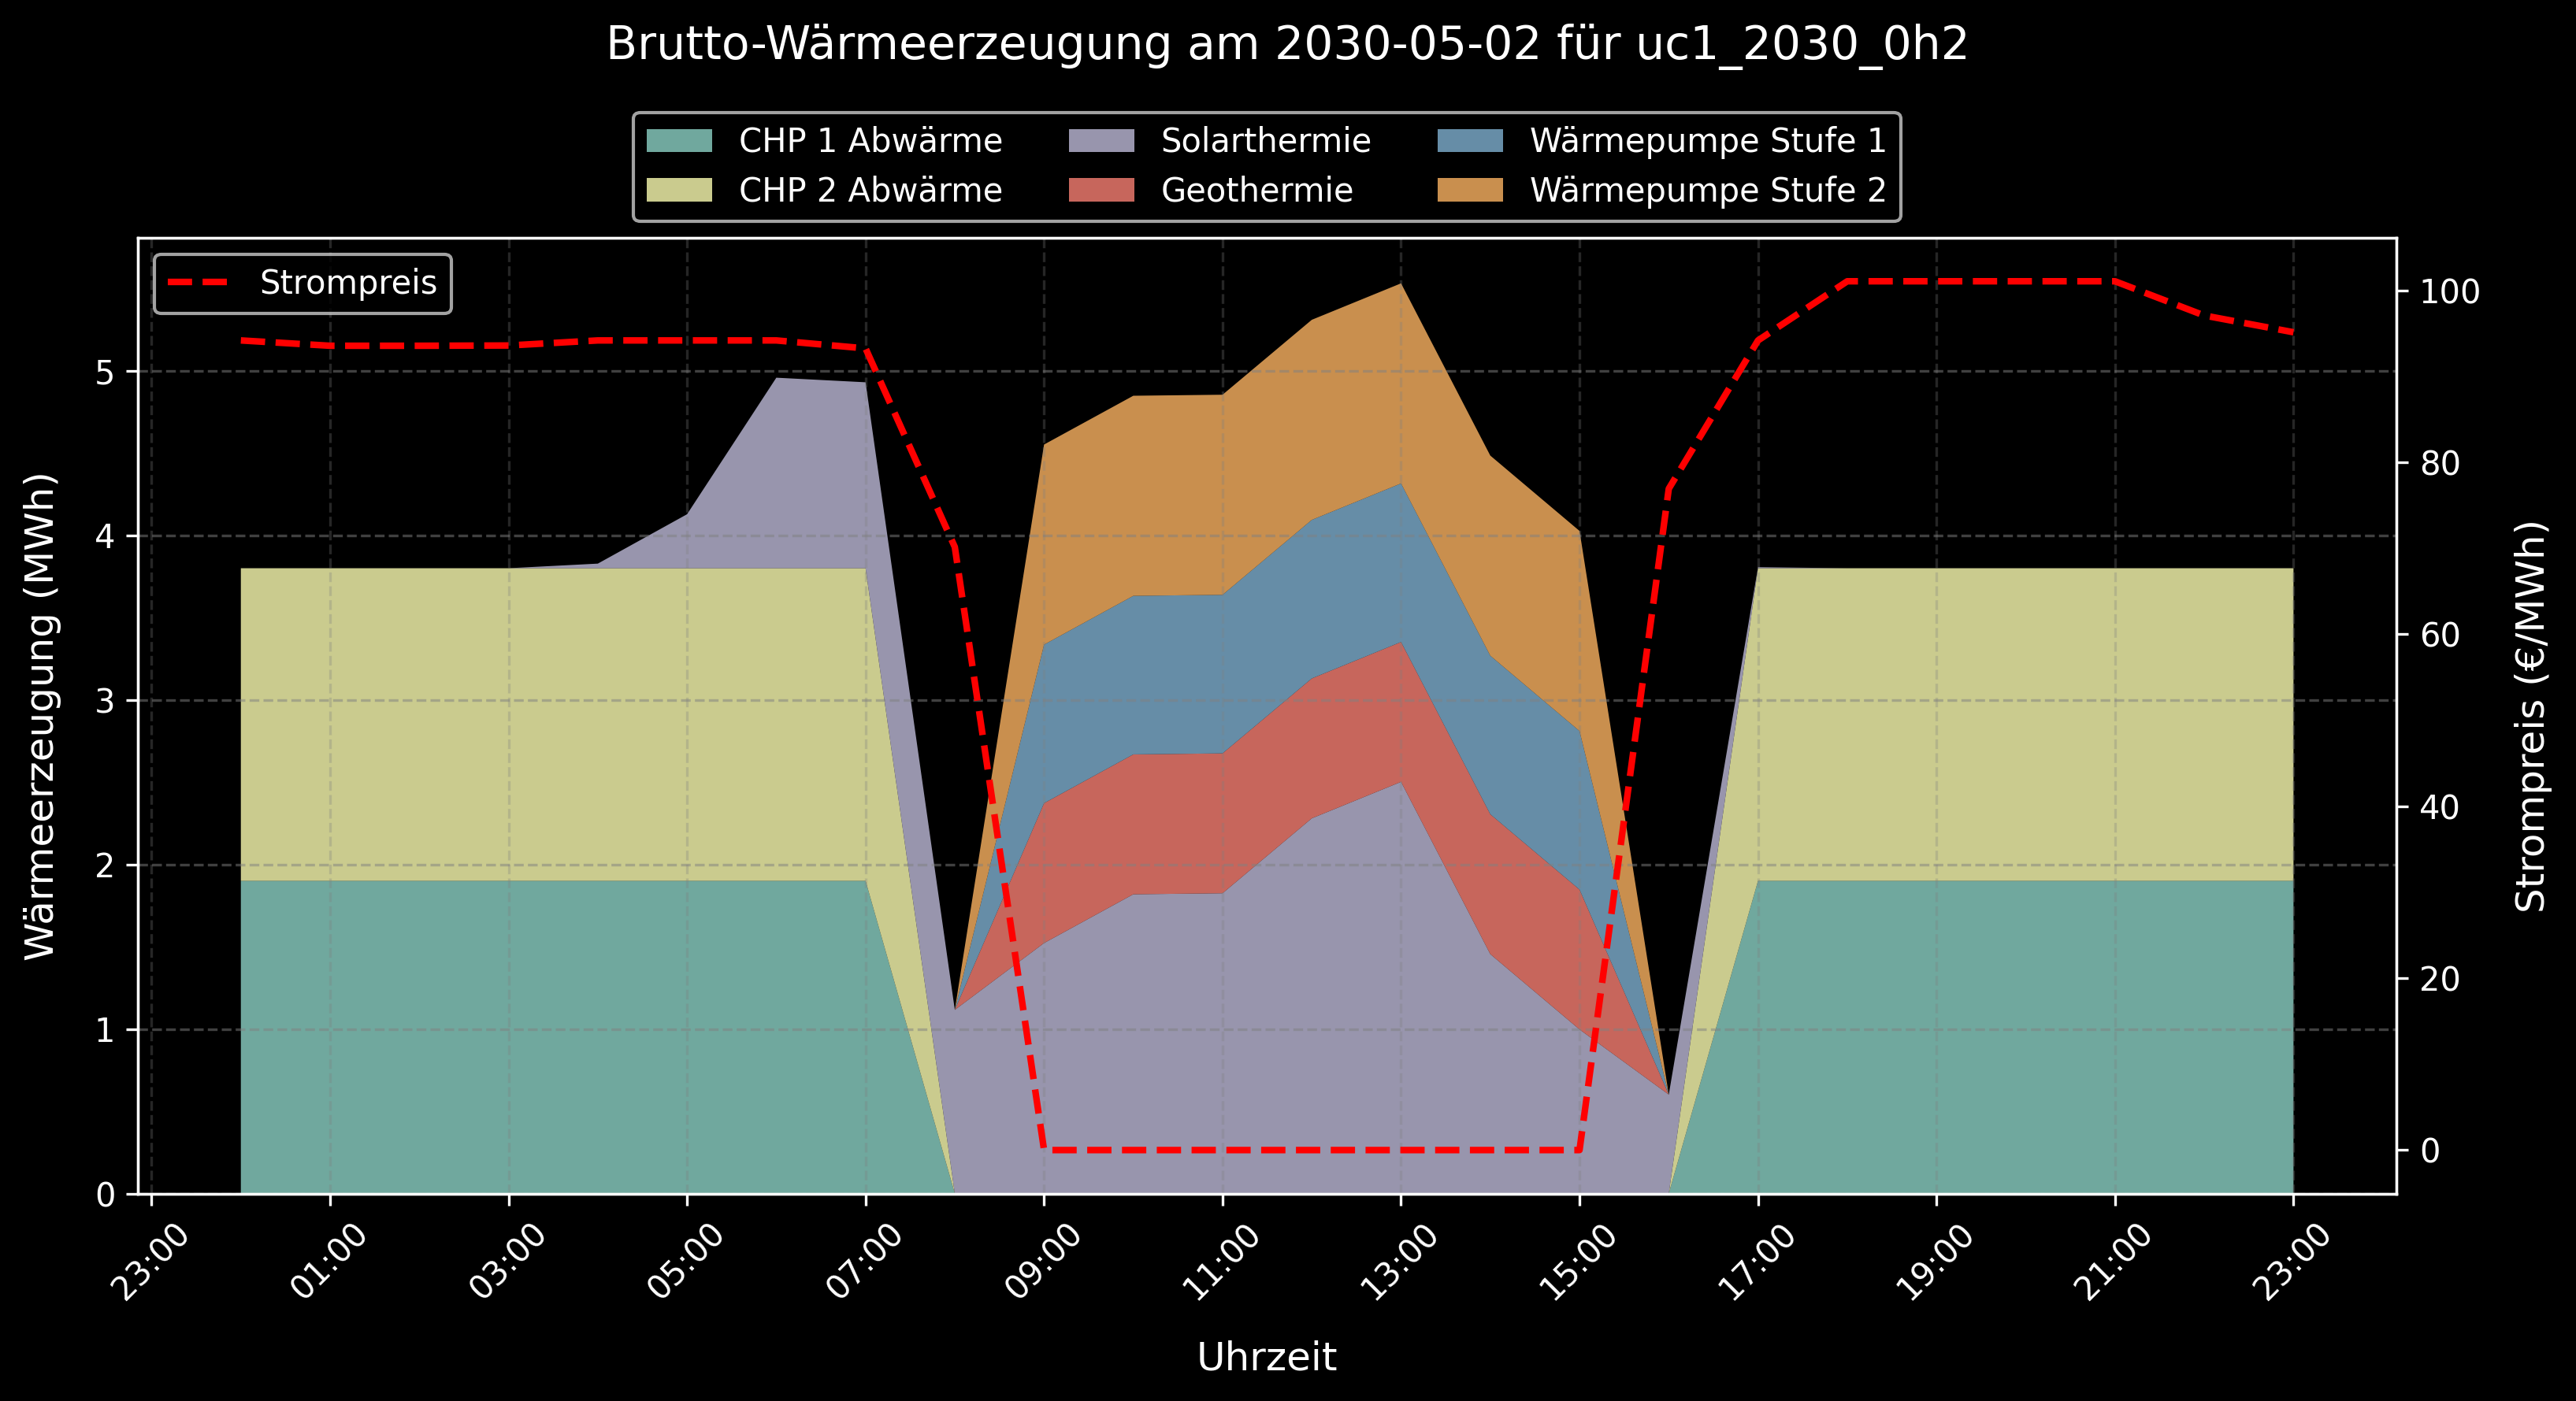

In [216]:
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.dates import HourLocator, DateFormatter, DayLocator

def brutto_heat_producer_analysis(df_hourly_data):
    """
    Extrahiert die relevanten Spalten für die Brutto-Wärmeerzeugeranalyse.
    Args:
        df_hourly_data (DataFrame): DataFrame mit stündlichen Daten für den ausgewählten Tag.
    Returns:
        DataFrame: Ein DataFrame mit den ausgewählten Wärmeerzeugerdaten.
    """
    metrics_df = pd.DataFrame(index=df_hourly_data.index)
    potential_cols = {
        'CHP 1 Abwärme': 'chp_1.waste_heat',
        'CHP 2 Abwärme': 'chp_2.waste_heat',
        'Solarthermie': 'solar_thermal.heat',
        'Geothermie': 'geo_heat_storage.heat_discharging',
        'Wärmepumpe Stufe 1': 'heatpump_s1.heat',
        'Wärmepumpe Stufe 2': 'heatpump_s2.heat'
    }
    
    for display_name, col_name in potential_cols.items():
        if col_name in df_hourly_data.columns:
            metrics_df[display_name] = df_hourly_data[col_name]
        else:
            print(f"Warnung: Spalte '{col_name}' nicht in den Daten für die Brutto-Wärmeerzeugeranalyse gefunden.")
            metrics_df[display_name] = 0 # Mit Null füllen, falls nicht vorhanden

    return metrics_df

# --- Hier den gewünschten Tag auswählen ---
selected_date_str = '2030-05-02' # Beispiel: 1. Januar 2030
# --- ---

try:
    # Sicherstellen, dass die Haupt-DataFrames geladen sind und einen DatetimeIndex haben
    if 'data_uc1_0h2' not in locals() or not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
        print("Lade data_uc1_0h2 neu oder konvertiere Index...")
        data_uc1_0h2 = scenario_uc1_0h2.load_output_data()
        if not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
            data_uc1_0h2.index = pd.to_datetime(data_uc1_0h2.index)

    # Start- und Enddatum für den ausgewählten Tag definieren (volle 24 Stunden)
    # Pandas >=2.2.0: pd.Timestamp Akzeptiert direkt den String
    start_datetime_day = pd.Timestamp(selected_date_str) 
    # Das Ende ist der Beginn des nächsten Tages, exklusiv
    end_datetime_day = start_datetime_day + pd.Timedelta(days=1)

    # Daten für den ausgewählten Tag filtern (z.B. für Szenario 0% H2)
    # Wir verwenden .loc für präzise Datumsbereichsauswahl
    daily_data_0h2 = data_uc1_0h2.loc[start_datetime_day:end_datetime_day - pd.Timedelta(hours=1)].copy() # .copy() um Warnungen zu vermeiden

    if daily_data_0h2.empty:
        print(f"Keine Daten für den ausgewählten Tag {selected_date_str} im Szenario {scenario_uc1_0h2.scenario_name_identifier} gefunden.")
    else:
        # Brutto-Wärmeerzeugeranalyse für den ausgewählten Tag durchführen
        df_brutto_daily = brutto_heat_producer_analysis(daily_data_0h2)

        print(f"\nBrutto-Wärmeerzeugung für {selected_date_str} ({scenario_uc1_0h2.scenario_name_identifier}):")
        print(df_brutto_daily)

        # --- Plot für den ausgewählten Tag ---
        fig_daily_brutto, ax_daily_brutto = plt.subplots(figsize=(11, 6), dpi=300) # Angepasste Größe/DPI

        # ax_daily_brutto.set_title(f'Brutto-Wärmeerzeugung am {selected_date_str} für {scenario_uc1_0h2.scenario_name_identifier}', fontsize=14)
        
        # Stackplot erstellen
        ax_daily_brutto.stackplot(df_brutto_daily.index, 
                                  df_brutto_daily.T, # Transponieren für stackplot
                                  labels=df_brutto_daily.columns, 
                                  alpha=0.8) # Etwas mehr Alpha
        
        # Zweite Y-Achse (rechts) für den Strompreis erstellen
        ax2_daily_brutto = ax_daily_brutto.twinx()

        line_power_price, = ax2_daily_brutto.plot(daily_data_0h2.index, daily_data_0h2['power_price'], color='red', linestyle='--', linewidth=2, label='Strompreis')
        ax2_daily_brutto.set_ylabel('Strompreis (€/MWh)', fontsize=12, labelpad=10)
        ax2_daily_brutto.tick_params(axis='y', labelsize=10)
        ax2_daily_brutto.legend(loc='upper left', fontsize=10, frameon=True)


        # Grid
        ax_daily_brutto.grid(which="major", axis='y', linestyle='--', color='gray', alpha=0.5)
        ax_daily_brutto.grid(which="major", axis='x', linestyle='--', color='gray', alpha=0.3)


        # X-Achse formatieren
        ax_daily_brutto.set_xlabel(f'Uhrzeit', fontsize=12, labelpad=10)
        ax_daily_brutto.xaxis.set_major_locator(HourLocator(interval=2)) # Alle 2 Stunden ein Tick
        ax_daily_brutto.xaxis.set_major_formatter(DateFormatter("%H:%M")) # Format: HH:MM
        ax_daily_brutto.tick_params(axis='x', labelrotation=45, labelsize=10)

        # Y-Achse formatieren
        ax_daily_brutto.set_ylabel('Wärmeerzeugung (MWh)', fontsize=12, labelpad=10) # Korrigierte Einheit/Beschreibung
        ax_daily_brutto.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10)) # Max 10 Ticks, ganze Zahlen
        ax_daily_brutto.tick_params(axis='y', labelsize=10)


        # Legende und Titel
        ax_daily_brutto.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0, 0, 0), ncol=len(df_brutto_daily.columns)/2, frameon=True)
        fig_daily_brutto.suptitle(f'Brutto-Wärmeerzeugung am {selected_date_str} für {scenario_uc1_0h2.scenario_name_identifier}', fontsize=14)
        
        plt.tight_layout()
        plt.show()

except NameError as e:
    print(f"Fehler: Ein benötigtes DataFrame (z.B. data_uc1_0h2) wurde nicht definiert. Stellen Sie sicher, dass die vorherigen Zellen ausgeführt wurden. Details: {e}")
except KeyError as e:
    print(f"Fehler: Eine erwartete Spalte wurde nicht in den Daten gefunden. Details: {e}")
    print("Überprüfen Sie die Spaltennamen in Ihren CSV-Dateien und in der Funktion 'brutto_heat_producer_analysis'.")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")


Brutto-Wärmeerzeugung für 2030-05-02 (uc1_2030_0h2):
                     CHP 1 Abwärme  CHP 2 Abwärme  Solarthermie  Geothermie  \
datetime                                                                      
2030-05-02 00:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 01:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 02:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 03:00:00            1.9            1.9      0.000000        0.00   
2030-05-02 04:00:00            1.9            1.9      0.027938        0.00   
2030-05-02 05:00:00            1.9            1.9      0.328107        0.00   
2030-05-02 06:00:00            1.9            1.9      1.157811        0.00   
2030-05-02 07:00:00            1.9            1.9      1.129987        0.00   
2030-05-02 08:00:00            0.0            0.0      1.116059        0.00   
2030-05-02 09:00:00            0.0            0.0      1.522111        0.85  

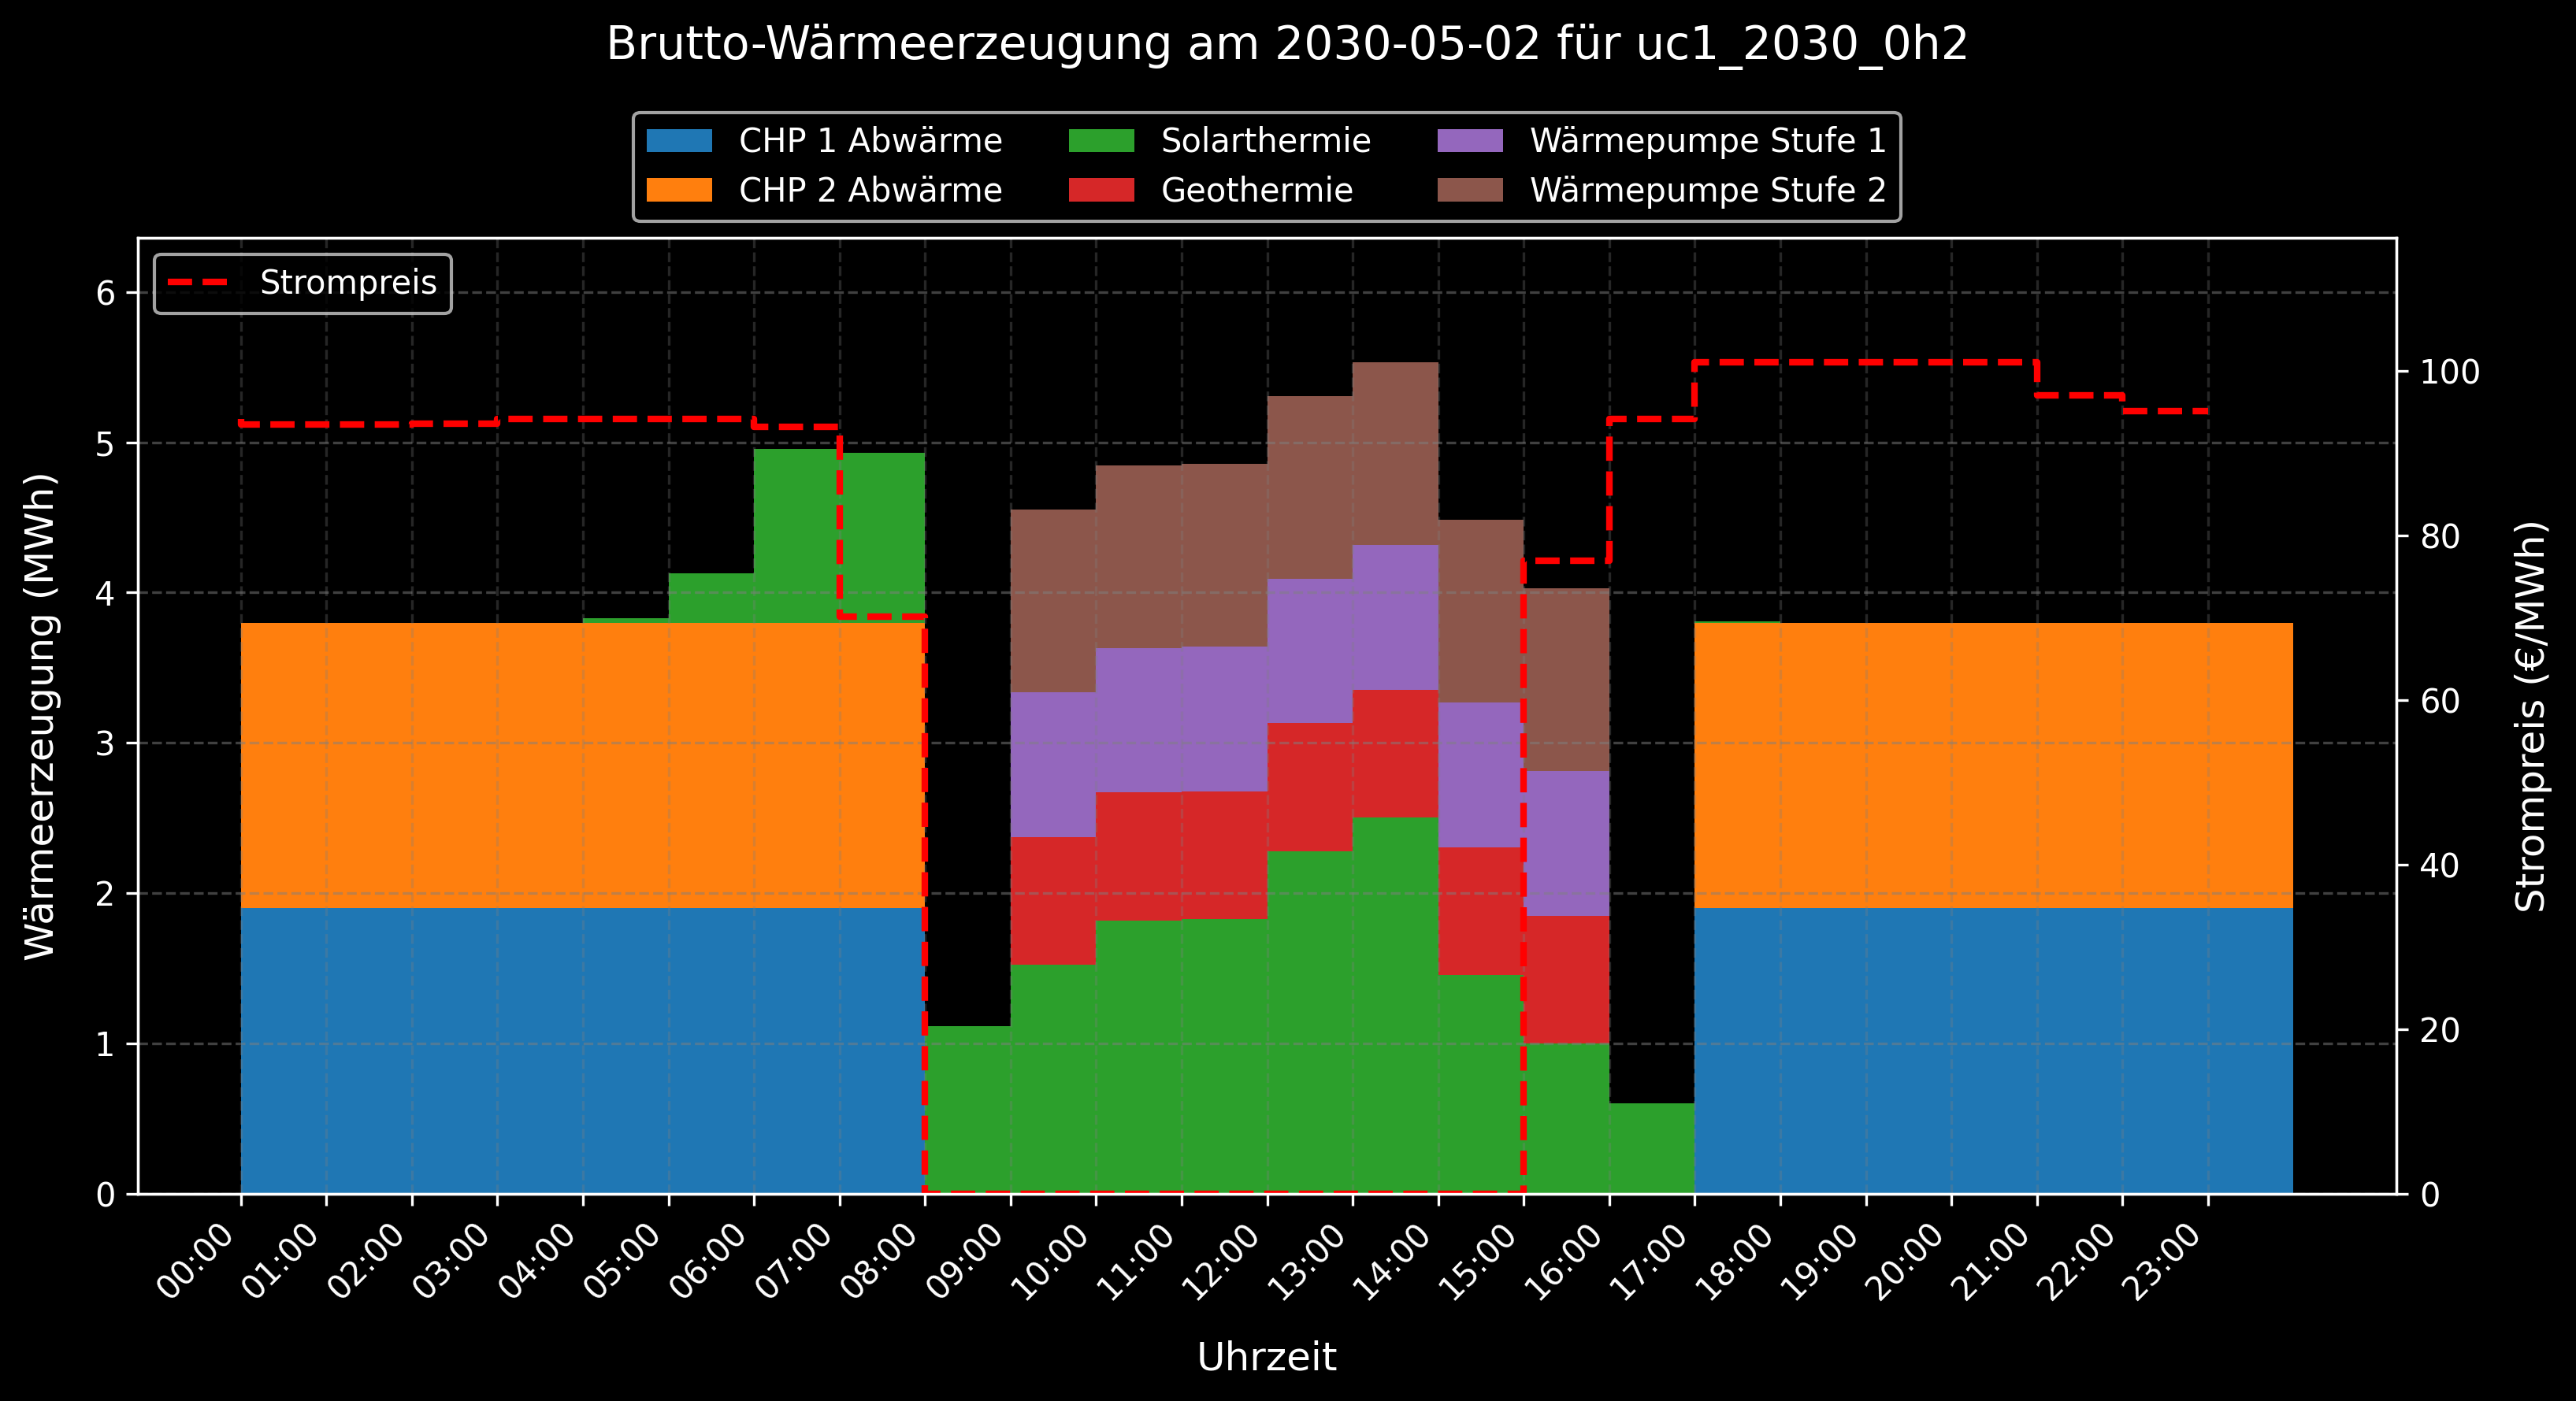

In [217]:
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.dates import HourLocator, DateFormatter, DayLocator
import numpy as np

def brutto_heat_producer_analysis(df_hourly_data):
    """
    Extrahiert die relevanten Spalten für die Brutto-Wärmeerzeugeranalyse.
    Args:
        df_hourly_data (DataFrame): DataFrame mit stündlichen Daten für den ausgewählten Tag.
    Returns:
        DataFrame: Ein DataFrame mit den ausgewählten Wärmeerzeugerdaten.
    """
    metrics_df = pd.DataFrame(index=df_hourly_data.index)
    potential_cols = {
        'CHP 1 Abwärme': 'chp_1.waste_heat',
        'CHP 2 Abwärme': 'chp_2.waste_heat',
        'Solarthermie': 'solar_thermal.heat',
        'Geothermie': 'geo_heat_storage.heat_discharging',
        'Wärmepumpe Stufe 1': 'heatpump_s1.heat',
        'Wärmepumpe Stufe 2': 'heatpump_s2.heat'
    }
    
    for display_name, col_name in potential_cols.items():
        if col_name in df_hourly_data.columns:
            metrics_df[display_name] = df_hourly_data[col_name]
        else:
            print(f"Warnung: Spalte '{col_name}' nicht in den Daten für die Brutto-Wärmeerzeugeranalyse gefunden.")
            metrics_df[display_name] = 0 # Mit Null füllen, falls nicht vorhanden

    return metrics_df

# --- Hier den gewünschten Tag auswählen ---
selected_date_str = '2030-05-02' # Beispiel: 1. Januar 2030
# --- ---

try:
    # Sicherstellen, dass die Haupt-DataFrames geladen sind und einen DatetimeIndex haben
    if 'data_uc1_0h2' not in locals() or not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
        print("Lade data_uc1_0h2 neu oder konvertiere Index...")
        data_uc1_0h2 = scenario_uc1_0h2.load_output_data()
        if not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
            data_uc1_0h2.index = pd.to_datetime(data_uc1_0h2.index)

    # Start- und Enddatum für den ausgewählten Tag definieren (volle 24 Stunden)
    start_datetime_day = pd.Timestamp(selected_date_str) 
    end_datetime_day = start_datetime_day + pd.Timedelta(days=1)

    # Daten für den ausgewählten Tag filtern
    daily_data_0h2 = data_uc1_0h2.loc[start_datetime_day:end_datetime_day - pd.Timedelta(hours=1)].copy()

    if daily_data_0h2.empty:
        print(f"Keine Daten für den ausgewählten Tag {selected_date_str} im Szenario {scenario_uc1_0h2.scenario_name_identifier} gefunden.")
    else:
        # Brutto-Wärmeerzeugeranalyse für den ausgewählten Tag durchführen
        df_brutto_daily = brutto_heat_producer_analysis(daily_data_0h2)

        print(f"\nBrutto-Wärmeerzeugung für {selected_date_str} ({scenario_uc1_0h2.scenario_name_identifier}):")
        print(df_brutto_daily)

        # --- Gestapelter Barplot für den ausgewählten Tag ---
        fig_daily_brutto, ax_daily_brutto = plt.subplots(figsize=(11, 6), dpi=300)

        x = np.arange(len(df_brutto_daily.index))
        width = 1.0  # Volle Breite, keine Lücke

        # Gestapelter Barplot
        bottom = np.zeros(len(df_brutto_daily))
        bar_handles = []
        for col, color in zip(df_brutto_daily.columns, plt.cm.tab10.colors):
            values = df_brutto_daily[col].values
            bar = ax_daily_brutto.bar(x, values, width=width, bottom=bottom, label=col, color=color, align='edge', edgecolor='none')
            bar_handles.append(bar)
            bottom += values

        # X-Ticks und -Labels: Uhrzeit
        ax_daily_brutto.set_xticks(x)
        ax_daily_brutto.set_xticklabels([ts.strftime("%H:%M") for ts in df_brutto_daily.index], rotation=45, ha='right', fontsize=10)
        ax_daily_brutto.set_xlabel(f'Uhrzeit', fontsize=12, labelpad=10)

        # Y-Achse formatieren (links, für Wärmeerzeugung)
        y_max = bottom.max()
        ax_daily_brutto.set_ylim(0, y_max * 1.15 if y_max > 0 else 1)  # 15% Platz nach oben
        ax_daily_brutto.set_ylabel('Wärmeerzeugung (MWh)', fontsize=12, labelpad=10)
        ax_daily_brutto.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
        ax_daily_brutto.tick_params(axis='y', labelsize=10)

        # Zweite Y-Achse (rechts) für den Strompreis
        ax2_daily_brutto = ax_daily_brutto.twinx()
        if 'power_price' in daily_data_0h2.columns:
            power_price_max = daily_data_0h2['power_price'].max()
            ax2_daily_brutto.step(x, daily_data_0h2['power_price'].values,where='pre', color='red', linestyle='--', linewidth=2, label='Strompreis')
            ax2_daily_brutto.set_ylim(0, power_price_max * 1.15 if power_price_max > 0 else 1)  # 15% Platz nach oben
            ax2_daily_brutto.set_ylabel('Strompreis (€/MWh)', fontsize=12, labelpad=10)
            ax2_daily_brutto.tick_params(axis='y', labelsize=10)
            ax2_daily_brutto.legend(loc='upper left', fontsize=10, frameon=True)
        else:
            print(f"Warnung: Spalte 'power_price' nicht in den Daten gefunden.")

        # Grid
        ax_daily_brutto.grid(which="major", axis='y', linestyle='--', color='gray', alpha=0.5)
        ax_daily_brutto.grid(which="major", axis='x', linestyle='--', color='gray', alpha=0.3)

        # Legende und Titel
        handles, labels = ax_daily_brutto.get_legend_handles_labels()
        ax_daily_brutto.legend(
            handles, labels,
            loc='lower center',
            bbox_to_anchor=(0.5, 1.0, 0, 0),
            ncol=3,
            frameon=True
        )
        fig_daily_brutto.suptitle(f'Brutto-Wärmeerzeugung am {selected_date_str} für {scenario_uc1_0h2.scenario_name_identifier}', fontsize=14)
        
        plt.tight_layout()
        plt.show()

except NameError as e:
    print(f"Fehler: Ein benötigtes DataFrame (z.B. data_uc1_0h2) wurde nicht definiert. Stellen Sie sicher, dass die vorherigen Zellen ausgeführt wurden. Details: {e}")
except KeyError as e:
    print(f"Fehler: Eine erwartete Spalte wurde nicht in den Daten gefunden. Details: {e}")
    print("Überprüfen Sie die Spaltennamen in Ihren CSV-Dateien und in der Funktion 'brutto_heat_producer_analysis'.")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")

## Brutto-Wärmeerzeuger-Vergleich: Nahwärmenetz (Barplot)


Brutto-Wärmeerzeugung für 2030-05-02 (uc1_2030_0h2):
                     chp 1 waste heat  chp 2 waste heat  solar thermal  \
datetime                                                                 
2030-05-02 00:00:00               1.9               1.9       0.000000   
2030-05-02 01:00:00               1.9               1.9       0.000000   
2030-05-02 02:00:00               1.9               1.9       0.000000   
2030-05-02 03:00:00               1.9               1.9       0.000000   
2030-05-02 04:00:00               1.9               1.9       0.027938   

                     geo thermal  heat pump (stage 1)  heat pump (stage 2)  
datetime                                                                    
2030-05-02 00:00:00          0.0                  0.0                  0.0  
2030-05-02 01:00:00          0.0                  0.0                  0.0  
2030-05-02 02:00:00          0.0                  0.0                  0.0  
2030-05-02 03:00:00          0.0          

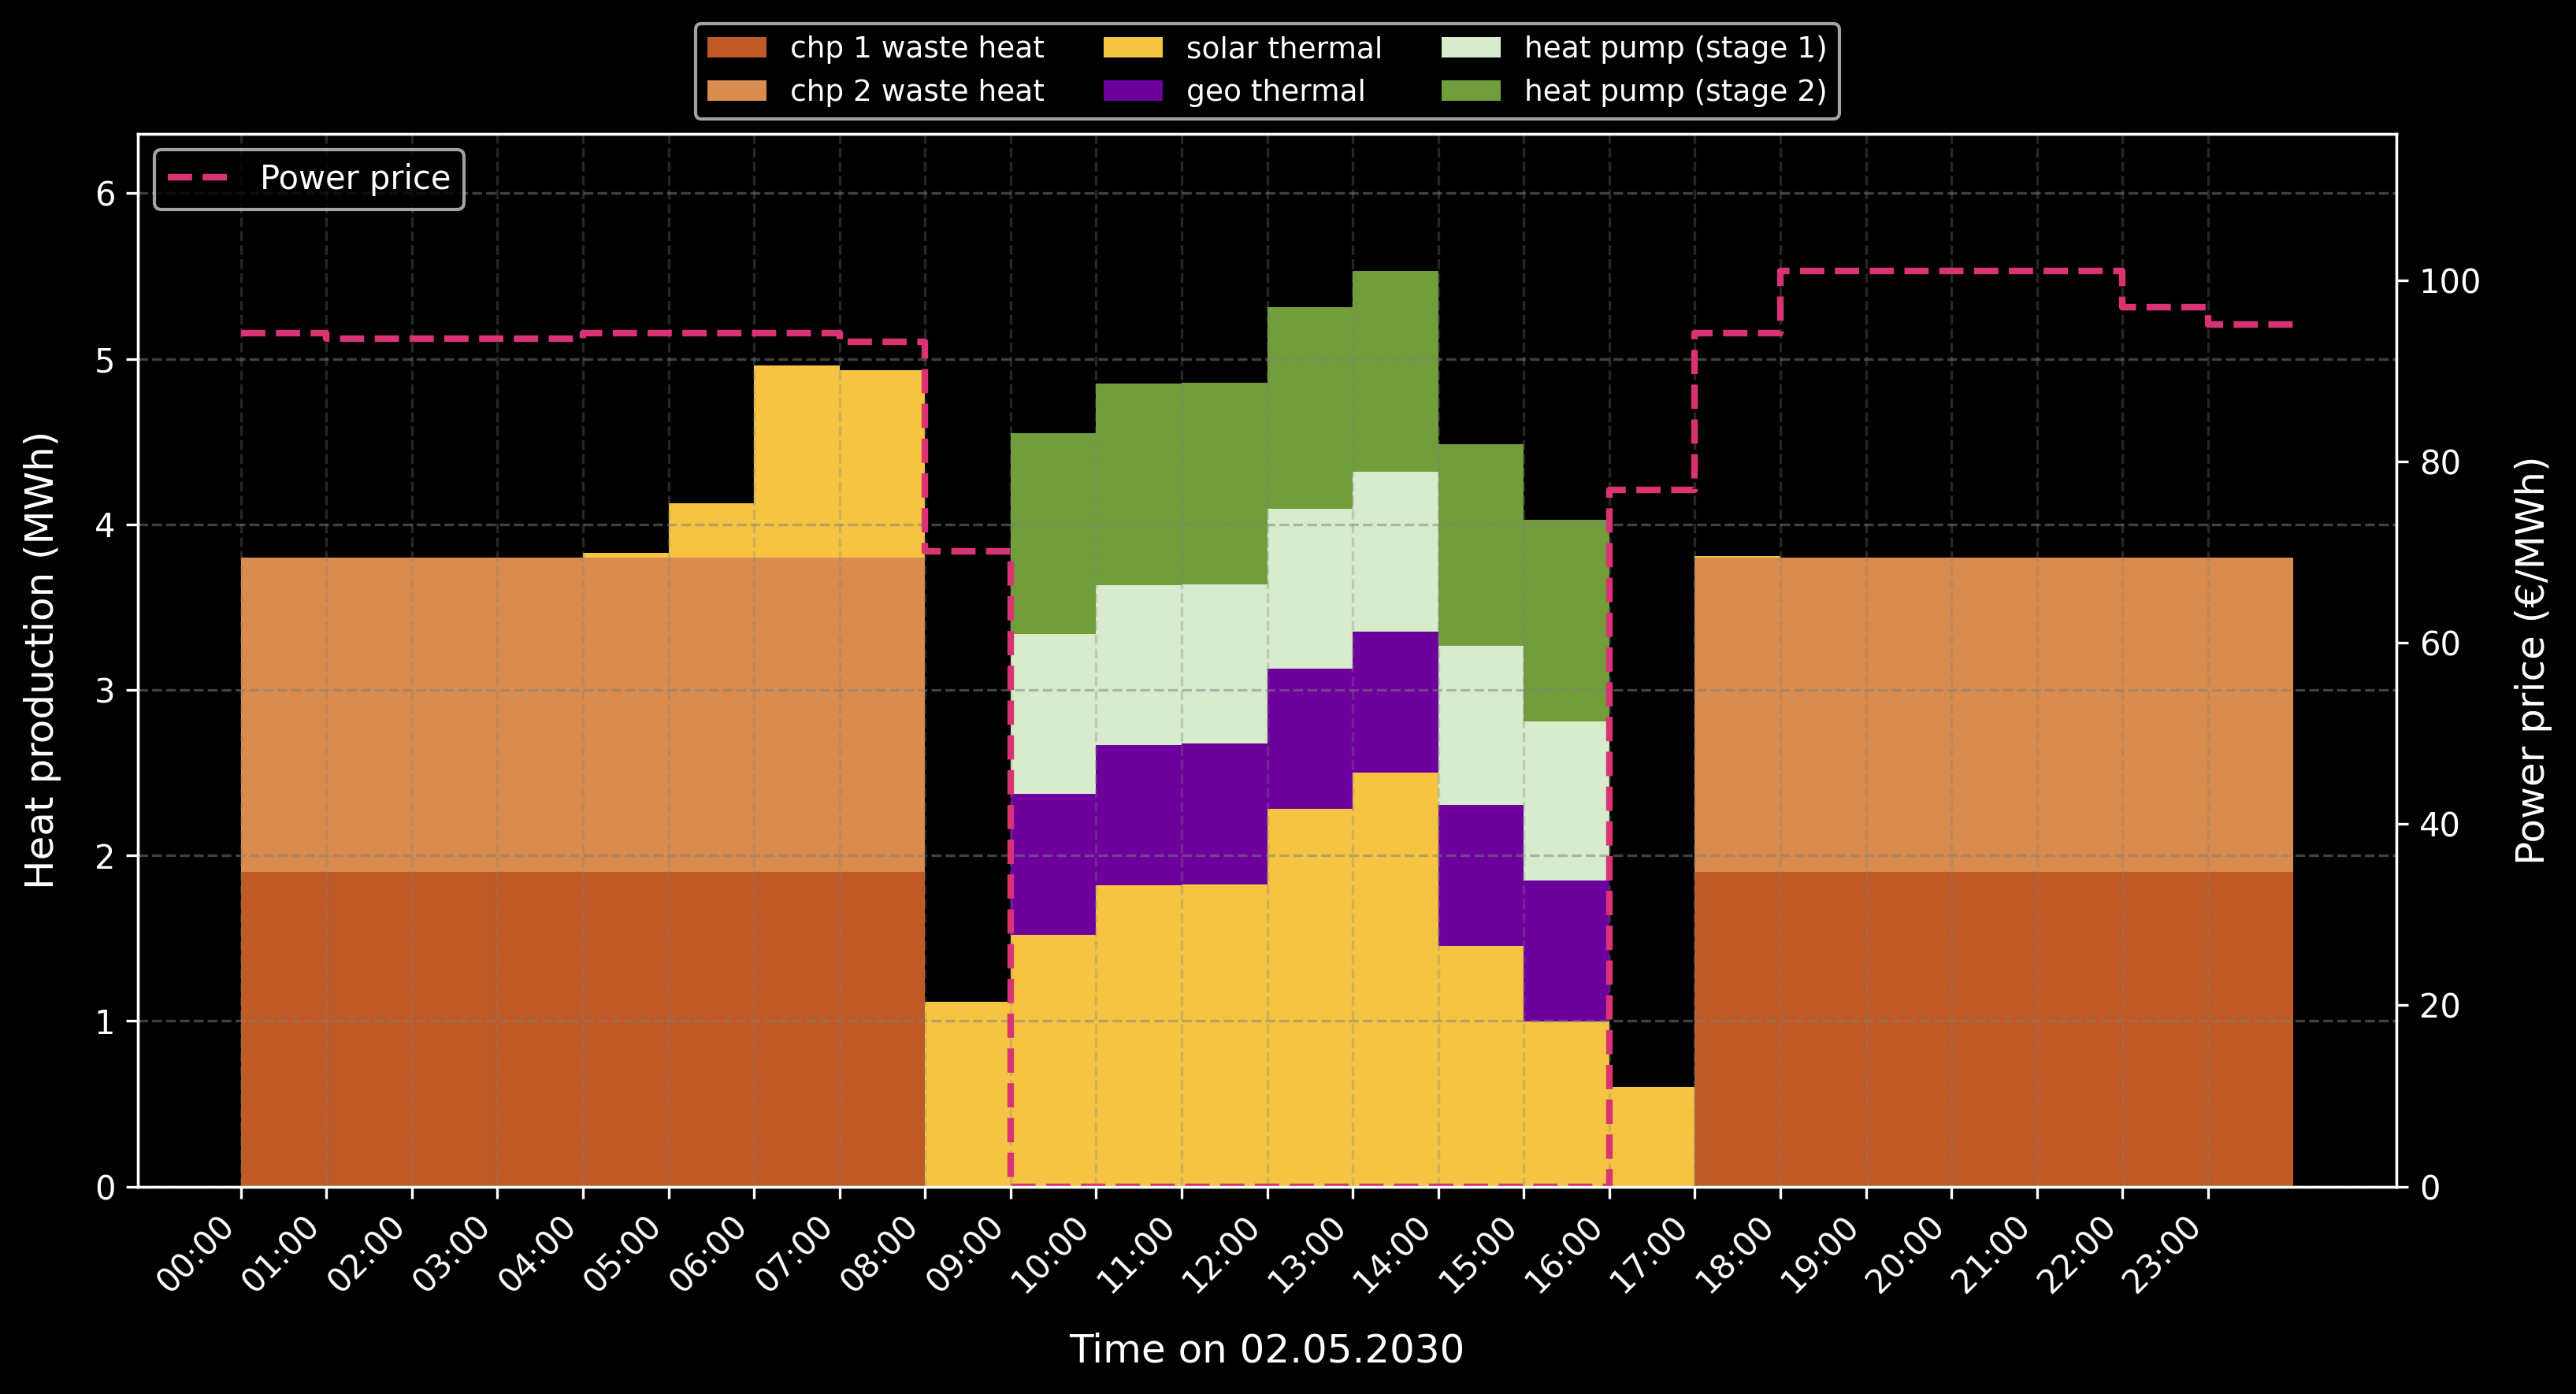


Brutto-Wärmeerzeugung für 2030-05-02 (uc1_2030_100h2):
                     chp 1 waste heat  chp 2 waste heat  solar thermal  \
datetime                                                                 
2030-05-02 00:00:00               1.6               1.6       0.000000   
2030-05-02 01:00:00               1.6               1.6       0.000000   
2030-05-02 02:00:00               1.6               1.6       0.000000   
2030-05-02 03:00:00               1.6               1.6       0.000000   
2030-05-02 04:00:00               1.6               1.6       0.027938   

                     geo thermal  heat pump (stage 1)  heat pump (stage 2)  
datetime                                                                    
2030-05-02 00:00:00          0.0                  0.0                  0.0  
2030-05-02 01:00:00          0.0                  0.0                  0.0  
2030-05-02 02:00:00          0.0                  0.0                  0.0  
2030-05-02 03:00:00          0.0        

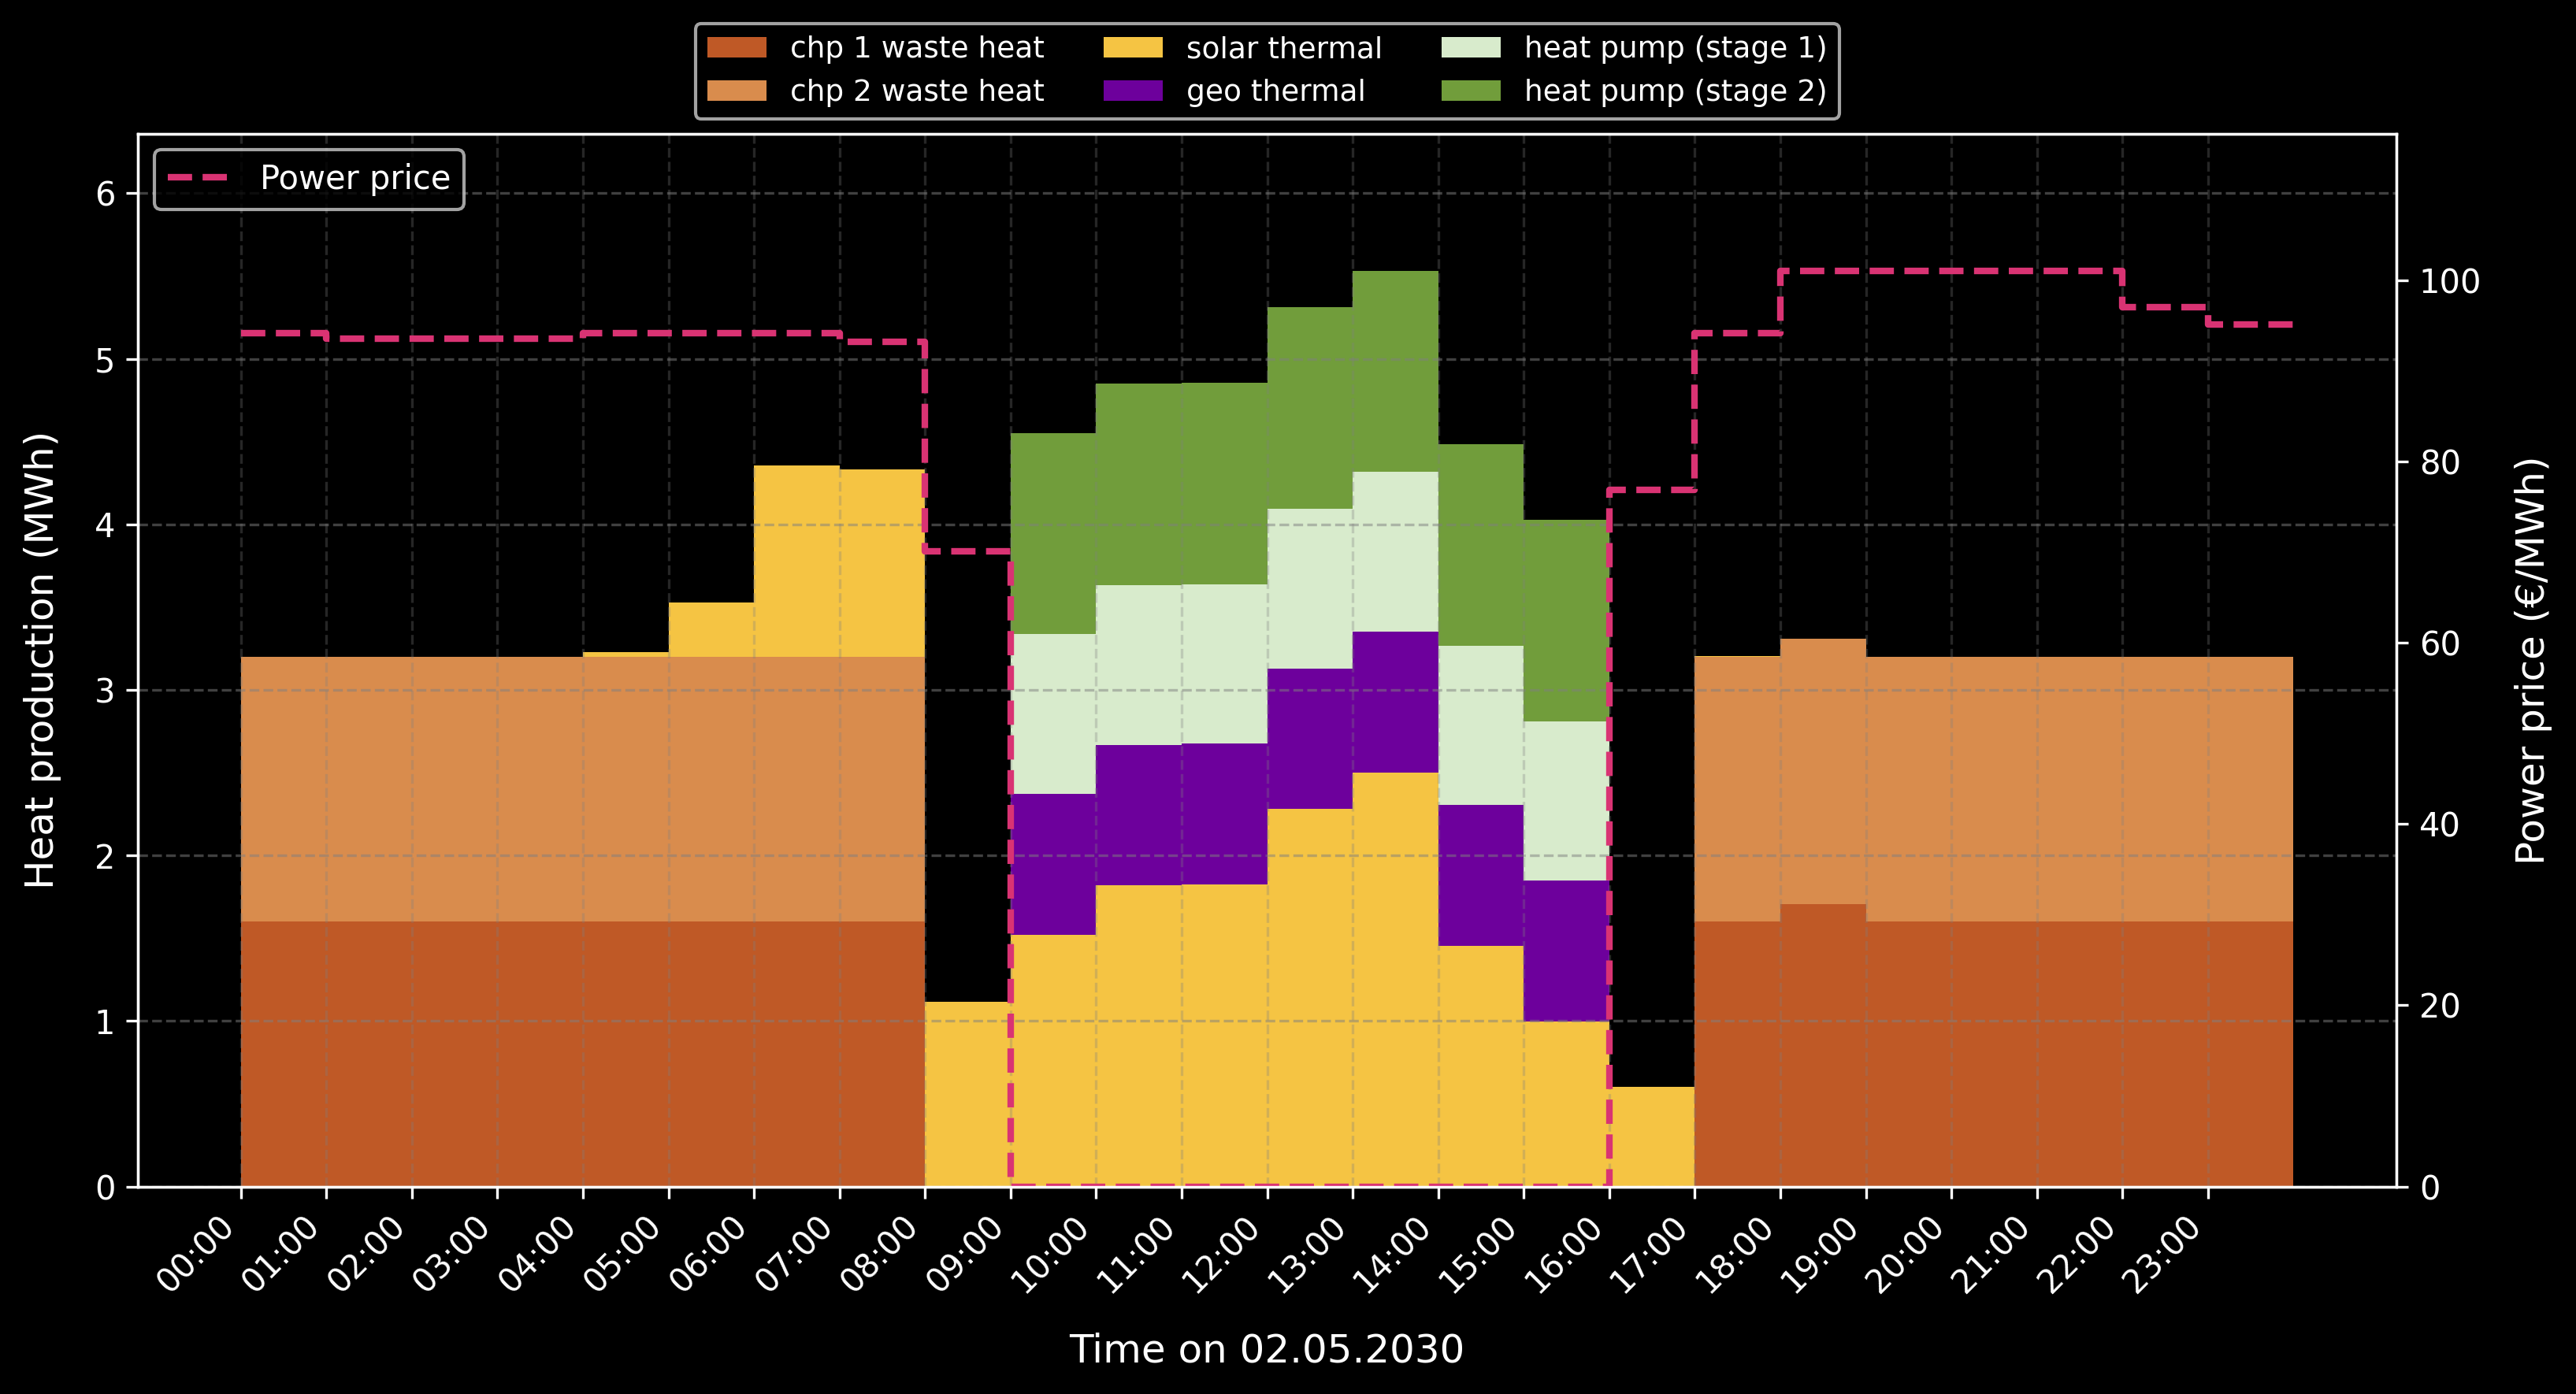

In [226]:
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.dates import HourLocator, DateFormatter, DayLocator
import numpy as np # Import für np.min/max, falls benötigt

def brutto_heat_producer_analysis(df_hourly_data):
    """
    Extrahiert die relevanten Spalten für die Brutto-Wärmeerzeugeranalyse.
    Args:
        df_hourly_data (DataFrame): DataFrame mit stündlichen Daten für den ausgewählten Tag.
    Returns:
        DataFrame: Ein DataFrame mit den ausgewählten Wärmeerzeugerdaten.
    """
    metrics_df = pd.DataFrame(index=df_hourly_data.index)
    potential_cols = {
        'chp 1 waste heat': 'chp_1.waste_heat',
        'chp 2 waste heat': 'chp_2.waste_heat',
        'solar thermal': 'solar_thermal.heat',
        'geo thermal': 'geo_heat_storage.heat_discharging',
        'heat pump (stage 1)': 'heatpump_s1.heat',
        'heat pump (stage 2)': 'heatpump_s2.heat'
    }
    
    for display_name, col_name in potential_cols.items():
        if col_name in df_hourly_data.columns:
            metrics_df[display_name] = df_hourly_data[col_name]
        else:
            print(f"Warnung: Spalte '{col_name}' nicht in den Daten für die Brutto-Wärmeerzeugeranalyse gefunden.")
            metrics_df[display_name] = 0 # Mit Null füllen, falls nicht vorhanden
    return metrics_df

def plot_daily_brutto_with_power_price(daily_data_scenario, df_brutto_scenario, scenario_obj, selected_date_timestamp):
    """
    Creates a stacked bar plot of daily gross heat production and power price for a given scenario and date.
    Bars are directly adjacent (no gap). Axes are set to leave space at the top.
    Color codes are manually selected from COLOR_DICT.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax_main = plt.subplots(figsize=(11, 6), dpi=300)

    # X-axis: time points (DatetimeIndex)
    x = np.arange(len(df_brutto_scenario.index))
    width = 1.0  # Full width, no gap

    # MANUAL color selection for bars (order and keys defined manually!)
    manual_color_keys = [
        "chp_1.waste_heat",
        "chp_2.waste_heat",
        "solar_thermal",
        "geo_heat_storage.heat_charging",
        "heatpump_s1",
        "heatpump_s2"
    ]
    colors = [COLOR_DICT.get(key, (0.5, 0.5, 0.5, 1.0)) for key in manual_color_keys[:len(df_brutto_scenario.columns)]]

    # Stacked bar plot
    bottom = np.zeros(len(df_brutto_scenario))
    bar_handles = []
    for i, col in enumerate(df_brutto_scenario.columns):
        values = df_brutto_scenario[col].values
        color = colors[i]
        bar = ax_main.bar(x, values, width=width, bottom=bottom, label=col, color=color, align='edge', edgecolor='none')
        bar_handles.append(bar)
        bottom += values

    # X-ticks and labels: time of day
    ax_main.set_xticks(x)
    ax_main.set_xticklabels([ts.strftime("%H:%M") for ts in df_brutto_scenario.index], rotation=45, ha='right', fontsize=10)
    ax_main.set_xlabel(f'Time on {selected_date_timestamp.strftime("%d.%m.%Y")}', fontsize=12, labelpad=10)

    # Y-axis formatting (left, for heat production)
    y_max = bottom.max()
    ax_main.set_ylim(0, y_max * 1.15 if y_max > 0 else 1)
    ax_main.set_ylabel('Heat production (MWh)', fontsize=12, labelpad=10)
    ax_main.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
    ax_main.tick_params(axis='y', labelsize=10)

    # Second Y-axis (right) for power price
    ax_twin = ax_main.twinx()
    if 'power_price' in daily_data_scenario.columns:
        power_price_max = daily_data_scenario['power_price'].max()
        color_power_price = COLOR_DICT.get('power_price', 'red')
        # Stepplot: extend x by one position, repeat last y value
        if len(x) > 1:
            delta = x[-1] - x[-2]
            x_last = x[-1] + delta
        else:
            x_last = x[-1] + 1
        x_step = np.append(x, x_last)
        y_step = np.append(daily_data_scenario['power_price'].values, daily_data_scenario['power_price'].values[-1])
        ax_twin.step(x_step, y_step, where='post', color=color_power_price, linestyle='--', linewidth=2, label='Power price')
        ax_twin.set_ylim(0, power_price_max * 1.15 if power_price_max > 0 else 1)
        ax_twin.set_ylabel('Power price (€/MWh)', fontsize=12, labelpad=10)
        ax_twin.tick_params(axis='y', labelsize=10)
        ax_twin.legend(loc='upper left', fontsize=10, frameon=True)
    else:
        print(f"Warning: Column 'power_price' not found in daily_data for {scenario_obj.scenario_name_identifier}.")

    # Grid
    ax_main.grid(which="major", axis='y', linestyle='--', color='gray', alpha=0.5)
    ax_main.grid(which="major", axis='x', linestyle='--', color='gray', alpha=0.3)

    # Legend for stacked bars
    handles, labels = ax_main.get_legend_handles_labels()
    ax_main.legend(
        handles, labels,
        loc='lower center',
        bbox_to_anchor=(0.5, 1, 0, 0),
        ncol=3,
        frameon=True,
        fontsize=9
    )

    fig.tight_layout()
    plt.show()

# --- Hier den gewünschten Tag auswählen ---
selected_date_str = '2030-05-02' 
# selected_date_str = '2030-06-20' 
# --- ---

# Start- und Enddatum für den ausgewählten Tag definieren (volle 24 Stunden)
start_datetime_day = pd.Timestamp(selected_date_str) 
end_datetime_day = start_datetime_day + pd.Timedelta(days=1)

# --- Analyse und Plot für 0% H2 Szenario ---
try:
    if 'data_uc1_0h2' not in locals() or not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
        print("Lade data_uc1_0h2 neu oder konvertiere Index...")
        data_uc1_0h2 = scenario_uc1_0h2.load_output_data()
        if not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
            data_uc1_0h2.index = pd.to_datetime(data_uc1_0h2.index)

    daily_data_0h2 = data_uc1_0h2.loc[start_datetime_day:end_datetime_day - pd.Timedelta(hours=1)].copy()

    if daily_data_0h2.empty:
        print(f"Keine Daten für den ausgewählten Tag {selected_date_str} im Szenario {scenario_uc1_0h2.scenario_name_identifier} gefunden.")
    else:
        df_brutto_daily_0h2 = brutto_heat_producer_analysis(daily_data_0h2)
        print(f"\nBrutto-Wärmeerzeugung für {selected_date_str} ({scenario_uc1_0h2.scenario_name_identifier}):")
        print(df_brutto_daily_0h2.head())
        plot_daily_brutto_with_power_price(daily_data_0h2, df_brutto_daily_0h2, scenario_uc1_0h2, start_datetime_day)

except NameError as e:
    print(f"Fehler (0% H2): Ein benötigtes Objekt (z.B. scenario_uc1_0h2) wurde nicht definiert. Details: {e}")
except KeyError as e:
    print(f"Fehler (0% H2): Eine erwartete Spalte wurde nicht gefunden. Details: {e}")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten (0% H2 Plot): {e}")

# --- Analyse und Plot für 100% H2 Szenario ---
try:
    if 'data_uc1_100h2' not in locals() or not isinstance(data_uc1_100h2.index, pd.DatetimeIndex):
        print("Lade data_uc1_100h2 neu oder konvertiere Index...")
        # Stellen Sie sicher, dass scenario_uc1_100h2 existiert und geladen werden kann
        data_uc1_100h2 = scenario_uc1_100h2.load_output_data() 
        if not isinstance(data_uc1_100h2.index, pd.DatetimeIndex):
            data_uc1_100h2.index = pd.to_datetime(data_uc1_100h2.index)

    daily_data_100h2 = data_uc1_100h2.loc[start_datetime_day:end_datetime_day - pd.Timedelta(hours=1)].copy()

    if daily_data_100h2.empty:
        print(f"Keine Daten für den ausgewählten Tag {selected_date_str} im Szenario {scenario_uc1_100h2.scenario_name_identifier} gefunden.")
    else:
        df_brutto_daily_100h2 = brutto_heat_producer_analysis(daily_data_100h2)
        print(f"\nBrutto-Wärmeerzeugung für {selected_date_str} ({scenario_uc1_100h2.scenario_name_identifier}):")
        print(df_brutto_daily_100h2.head())
        plot_daily_brutto_with_power_price(daily_data_100h2, df_brutto_daily_100h2, scenario_uc1_100h2, start_datetime_day)

except NameError as e:
    print(f"Fehler (100% H2): Ein benötigtes Objekt (z.B. scenario_uc1_100h2) wurde nicht definiert. Details: {e}")
except KeyError as e:
    print(f"Fehler (100% H2): Eine erwartete Spalte wurde nicht gefunden. Details: {e}")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten (100% H2 Plot): {e}")


In [219]:
summary_geo_df

,Geothermie Geladen (MWh),Geothermie Entladen (MWh),Netto Geothermie Speicheränderung (MWh),Leistung Z1 FW (MWh),Leistung Z1 NW (MWh),Leistung Z2 NW (MWh),Input WP (MWh),Gesamtleistung (MWh)
uc1_2030_0h2,14.859857,1561.296056,1546.436199,2791.083090,1743.006213,5285.989871,5285.989871,9820.079174
uc1_2030_100h2,40.467824,1186.736286,1146.268462,3455.975695,1078.113608,7706.530195,7706.530195,12240.619498


Zusammenfassung der KWK-Kennzahlen:
                Wärme CHP1 (MWh)  Wärme CHP2 (MWh)  Wärme Total (MWh)  \
uc1_2030_0h2       261674.107745     234996.296384      496670.404129   
uc1_2030_100h2     247348.923293     246900.940512      494249.863805   

                Betriebsstunden CHP1 (h)  Betriebsstunden CHP2 (h)  \
uc1_2030_0h2                      3302.0                    2960.0   
uc1_2030_100h2                    5744.0                    5744.0   

                Starts CHP1  Starts CHP2  
uc1_2030_0h2          610.0        608.0  
uc1_2030_100h2        371.0        364.0  




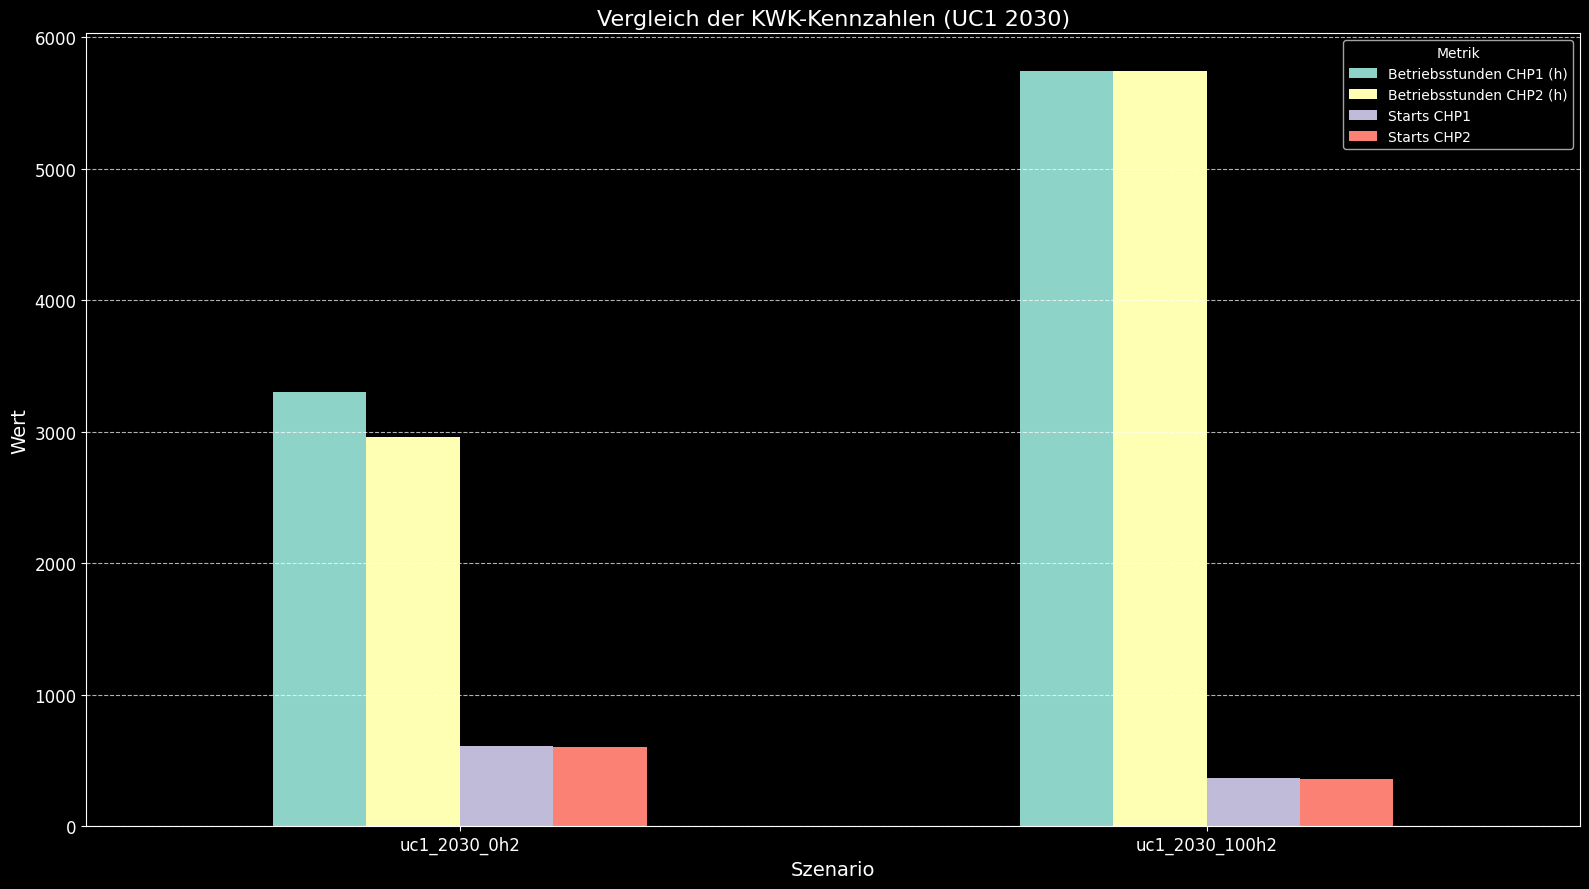

In [220]:
try:
    # Daten einmal laden
    output_0h2 = scenario_uc1_0h2.load_output_data()
    output_100h2 = scenario_uc1_100h2.load_output_data()

    # Funktion zur Berechnung der Kennzahlen für ein Szenario
    def calculate_chp_metrics(output_df, scenario_name):
        metrics = {}
        # Gesamtwärme
        metrics['Wärme CHP1 (MWh)'] = output_df['chp_1.heat'].sum()
        metrics['Wärme CHP2 (MWh)'] = output_df['chp_2.heat'].sum()
        metrics['Wärme Total (MWh)'] = metrics['Wärme CHP1 (MWh)'] + metrics['Wärme CHP2 (MWh)']
        
        # Betriebsstunden
        metrics['Betriebsstunden CHP1 (h)'] = output_df['chp_1.bin'].sum()
        metrics['Betriebsstunden CHP2 (h)'] = output_df['chp_2.bin'].sum()
        
        # Starts
        chp_1_bin = output_df['chp_1.bin']
        metrics['Starts CHP1'] = (chp_1_bin.diff() == 1).sum()
        
        chp_2_bin = output_df['chp_2.bin']
        metrics['Starts CHP2'] = (chp_2_bin.diff() == 1).sum()
                
        return pd.Series(metrics, name=scenario_name)

    # Kennzahlen für beide Szenarien berechnen
    metrics_0h2 = calculate_chp_metrics(output_0h2, scenario_uc1_0h2.scenario_name_identifier)
    metrics_100h2 = calculate_chp_metrics(output_100h2, scenario_uc1_100h2.scenario_name_identifier)

    # Zusammenfassender DataFrame
    summary_chp_df = pd.DataFrame([metrics_0h2, metrics_100h2])

    print("Zusammenfassung der KWK-Kennzahlen:")
    print(summary_chp_df)
    print("\n==========================================\n")

    # Vergleichendes Balkendiagramm für ausgewählte Kennzahlen
    # Auswahl der Metriken für den Plot
    metrics_to_plot_chp = [
        'Betriebsstunden CHP1 (h)', 
        'Betriebsstunden CHP2 (h)',
        'Starts CHP1',
        'Starts CHP2',
    ]
    
    plot_chp_df = summary_chp_df[metrics_to_plot_chp]

    fig, ax = plt.subplots(figsize=(16, 9))
    plot_chp_df.plot(kind='bar', ax=ax)
    
    ax.set_title('Vergleich der KWK-Kennzahlen (UC1 2030)', fontsize=16)
    ax.set_ylabel('Wert', fontsize=14)
    ax.set_xlabel('Szenario', fontsize=14)
    ax.tick_params(axis='x', rotation=0, labelsize=12) # Szenarionamen direkt als Ticks
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(title='Metrik', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Ein Fehler ist in der KWK-Auswertung aufgetreten: {e}")
    print("Überprüfen Sie die Struktur der Output-Daten und die Berechnung der Kennzahlen.")

In [221]:
summary_chp_df

,Wärme CHP1 (MWh),Wärme CHP2 (MWh),Wärme Total (MWh),Betriebsstunden CHP1 (h),Betriebsstunden CHP2 (h),Starts CHP1,Starts CHP2
uc1_2030_0h2,261674.107745,234996.296384,496670.404129,3302.0,2960.0,610.0,608.0
uc1_2030_100h2,247348.923293,246900.940512,494249.863805,5744.0,5744.0,371.0,364.0


## Fernwärme


Gross heat production for 2030-05-02 (uc1_2030_0h2):
                     chp 1 heat  chp 2 heat  chp 1 waste heat  \
datetime                                                        
2030-05-02 00:00:00        82.0        82.0               1.9   
2030-05-02 01:00:00        82.0        82.0               1.9   
2030-05-02 02:00:00        82.0        82.0               1.9   
2030-05-02 03:00:00        82.0        82.0               1.9   
2030-05-02 04:00:00        82.0        82.0               1.9   
2030-05-02 05:00:00        82.0        82.0               1.9   
2030-05-02 06:00:00        82.0        82.0               1.9   
2030-05-02 07:00:00        82.0        82.0               1.9   
2030-05-02 08:00:00         0.0         0.0               0.0   
2030-05-02 09:00:00         0.0         0.0               0.0   
2030-05-02 10:00:00         0.0         0.0               0.0   
2030-05-02 11:00:00         0.0         0.0               0.0   
2030-05-02 12:00:00         0.0     

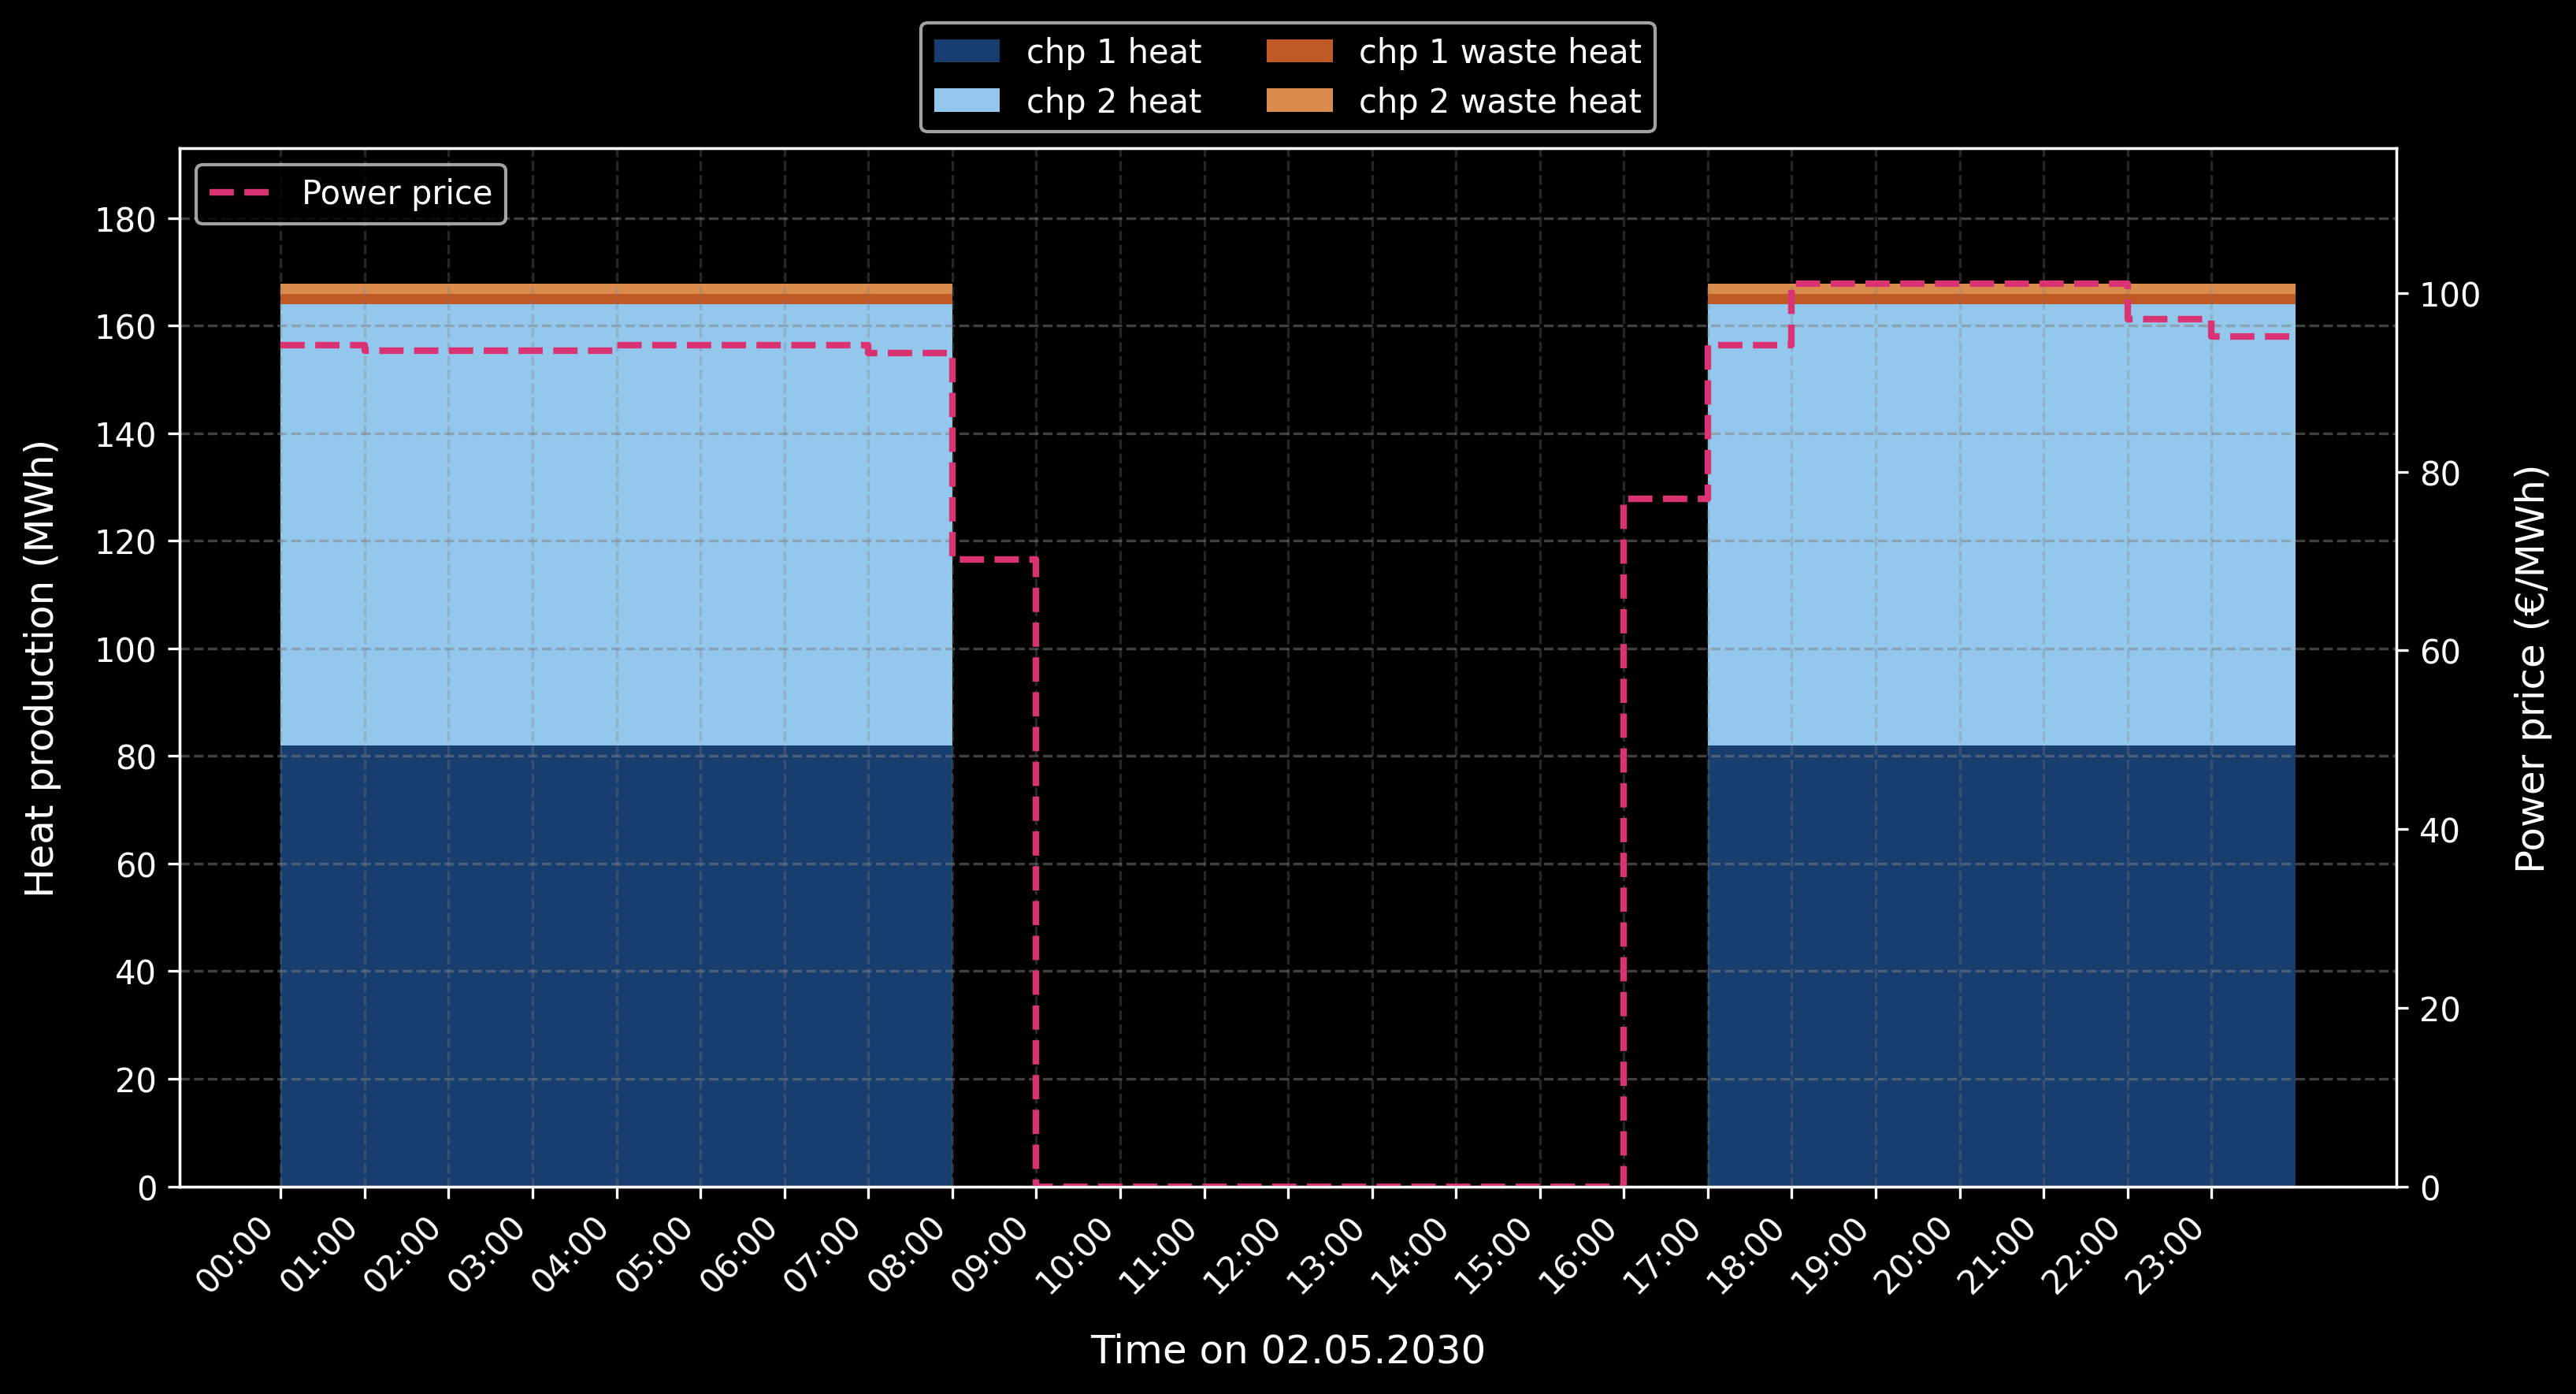

In [228]:
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.dates import HourLocator, DateFormatter, DayLocator
import numpy as np

def brutto_heat_producer_analysis(df_hourly_data):
    """
    Extrahiert die relevanten Spalten für die Brutto-Wärmeerzeugeranalyse.
    Args:
        df_hourly_data (DataFrame): DataFrame mit stündlichen Daten für den ausgewählten Tag.
    Returns:
        DataFrame: Ein DataFrame mit den ausgewählten Wärmeerzeugerdaten.
    """
    metrics_df = pd.DataFrame(index=df_hourly_data.index)
    potential_cols = {
        'chp 1 heat': 'chp_1.heat',
        'chp 2 heat': 'chp_2.heat',
        'chp 1 waste heat': 'chp_1.waste_heat',
        'chp 2 waste heat': 'chp_2.waste_heat',
    }
    
    for display_name, col_name in potential_cols.items():
        if col_name in df_hourly_data.columns:
            metrics_df[display_name] = df_hourly_data[col_name]
        else:
            print(f"Warnung: Spalte '{col_name}' nicht in den Daten für die Brutto-Wärmeerzeugeranalyse gefunden.")
            metrics_df[display_name] = 0 # Mit Null füllen, falls nicht vorhanden

    # MANUELLE Farbauswahl für die Balken (Reihenfolge und Keys selbst bestimmen!)
    manual_color_keys = [
        "chp_1",    # für 'CHP 1 Wärme'
        "chp_2",    # für 'CHP 2 Wärme'
        "chp_1.waste_heat",    # für 'CHP 1 Abwärme'
        "chp_2.waste_heat"     # für 'CHP 2 Abwärme'
    ]
    colors = [COLOR_DICT.get(key, (0.5, 0.5, 0.5, 1.0)) for key in manual_color_keys[:len(metrics_df.columns)]]
    metrics_df.attrs['colors'] = colors  # Farben als Attribut speichern (optional)

    return metrics_df

# --- Hier den gewünschten Tag auswählen ---
selected_date_str = '2030-05-02' # Beispiel: 1. Januar 2030
# --- ---

try:
    # Ensure main DataFrames are loaded and have a DatetimeIndex
    if 'data_uc1_0h2' not in locals() or not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
        print("Reloading data_uc1_0h2 or converting index...")
        data_uc1_0h2 = scenario_uc1_0h2.load_output_data()
        if not isinstance(data_uc1_0h2.index, pd.DatetimeIndex):
            data_uc1_0h2.index = pd.to_datetime(data_uc1_0h2.index)

    # Define start and end datetime for the selected day (full 24 hours)
    start_datetime_day = pd.Timestamp(selected_date_str) 
    end_datetime_day = start_datetime_day + pd.Timedelta(days=1)

    # Filter data for the selected day
    daily_data_0h2 = data_uc1_0h2.loc[start_datetime_day:end_datetime_day - pd.Timedelta(hours=1)].copy()

    if daily_data_0h2.empty:
        print(f"No data for the selected day {selected_date_str} in scenario {scenario_uc1_0h2.scenario_name_identifier}.")
    else:
        # Gross heat producer analysis for the selected day
        df_brutto_daily = brutto_heat_producer_analysis(daily_data_0h2)
        colors = df_brutto_daily.attrs['colors']

        print(f"\nGross heat production for {selected_date_str} ({scenario_uc1_0h2.scenario_name_identifier}):")
        print(df_brutto_daily)

        # --- Stacked bar plot for the selected day ---
        fig_daily_brutto, ax_daily_brutto = plt.subplots(figsize=(11, 6), dpi=300)

        x = np.arange(len(df_brutto_daily.index))
        width = 1.0  # Full width, no gap

        # Stacked bar plot with manual colors
        bottom = np.zeros(len(df_brutto_daily))
        bar_handles = []
        for i, (col, color) in enumerate(zip(df_brutto_daily.columns, colors)):
            values = df_brutto_daily[col].values
            bar = ax_daily_brutto.bar(x, values, width=width, bottom=bottom, label=col, color=color, align='edge', edgecolor='none')
            bar_handles.append(bar)
            bottom += values

        # X-ticks and labels: time of day
        ax_daily_brutto.set_xticks(x)
        ax_daily_brutto.set_xticklabels([ts.strftime("%H:%M") for ts in df_brutto_daily.index], rotation=45, ha='right', fontsize=10)
        ax_daily_brutto.set_xlabel(f'Time on {start_datetime_day.strftime("%d.%m.%Y")}', fontsize=12, labelpad=10)

        # Y-axis formatting (left, for heat production)
        y_max = bottom.max()
        ax_daily_brutto.set_ylim(0, y_max * 1.15 if y_max > 0 else 1)  # 15% headroom
        ax_daily_brutto.set_ylabel('Heat production (MWh)', fontsize=12, labelpad=10)
        ax_daily_brutto.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
        ax_daily_brutto.tick_params(axis='y', labelsize=10)

        # Second Y-axis (right) for power price (step plot with extended x/y)
        ax2_daily_brutto = ax_daily_brutto.twinx()
        if 'power_price' in daily_data_0h2.columns:
            power_price_max = daily_data_0h2['power_price'].max()
            # Stepplot: extend x by one position, repeat last y value
            if len(x) > 1:
                delta = x[-1] - x[-2]
                x_last = x[-1] + delta
            else:
                x_last = x[-1] + 1
            x_step = np.append(x, x_last)
            y_step = np.append(daily_data_0h2['power_price'].values, daily_data_0h2['power_price'].values[-1])
            color_power_price = COLOR_DICT.get('power_price', 'red')
            ax2_daily_brutto.step(x_step, y_step, where='post', color=color_power_price, linestyle='--', linewidth=2, label='Power price')
            ax2_daily_brutto.set_ylim(0, power_price_max * 1.15 if power_price_max > 0 else 1)  # 15% headroom
            ax2_daily_brutto.set_ylabel('Power price (€/MWh)', fontsize=12, labelpad=10)
            ax2_daily_brutto.tick_params(axis='y', labelsize=10)
            ax2_daily_brutto.legend(loc='upper left', fontsize=10, frameon=True)
        else:
            print(f"Warning: Column 'power_price' not found in the data.")

        # Grid
        ax_daily_brutto.grid(which="major", axis='y', linestyle='--', color='gray', alpha=0.5)
        ax_daily_brutto.grid(which="major", axis='x', linestyle='--', color='gray', alpha=0.3)

        # Legend and title
        handles, labels = ax_daily_brutto.get_legend_handles_labels()
        ax_daily_brutto.legend(
            handles, labels,
            loc='lower center',
            bbox_to_anchor=(0.5, 1.0, 0, 0),
            ncol=max(1, int(np.ceil(len(df_brutto_daily.columns)/2))),
            frameon=True
        )
        # fig_daily_brutto.suptitle(f'Gross heat production on {selected_date_str} for {scenario_uc1_0h2.scenario_name_identifier}', fontsize=14)
        
        plt.tight_layout()
        plt.show()

except NameError as e:
    print(f"Error: A required DataFrame (e.g. data_uc1_0h2) was not defined. Make sure previous cells have been executed. Details: {e}")
except KeyError as e:
    print(f"Error: An expected column was not found in the data. Details: {e}")
    print("Check the column names in your CSV files and in the function 'brutto_heat_producer_analysis'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

## Fernwärmespeicher

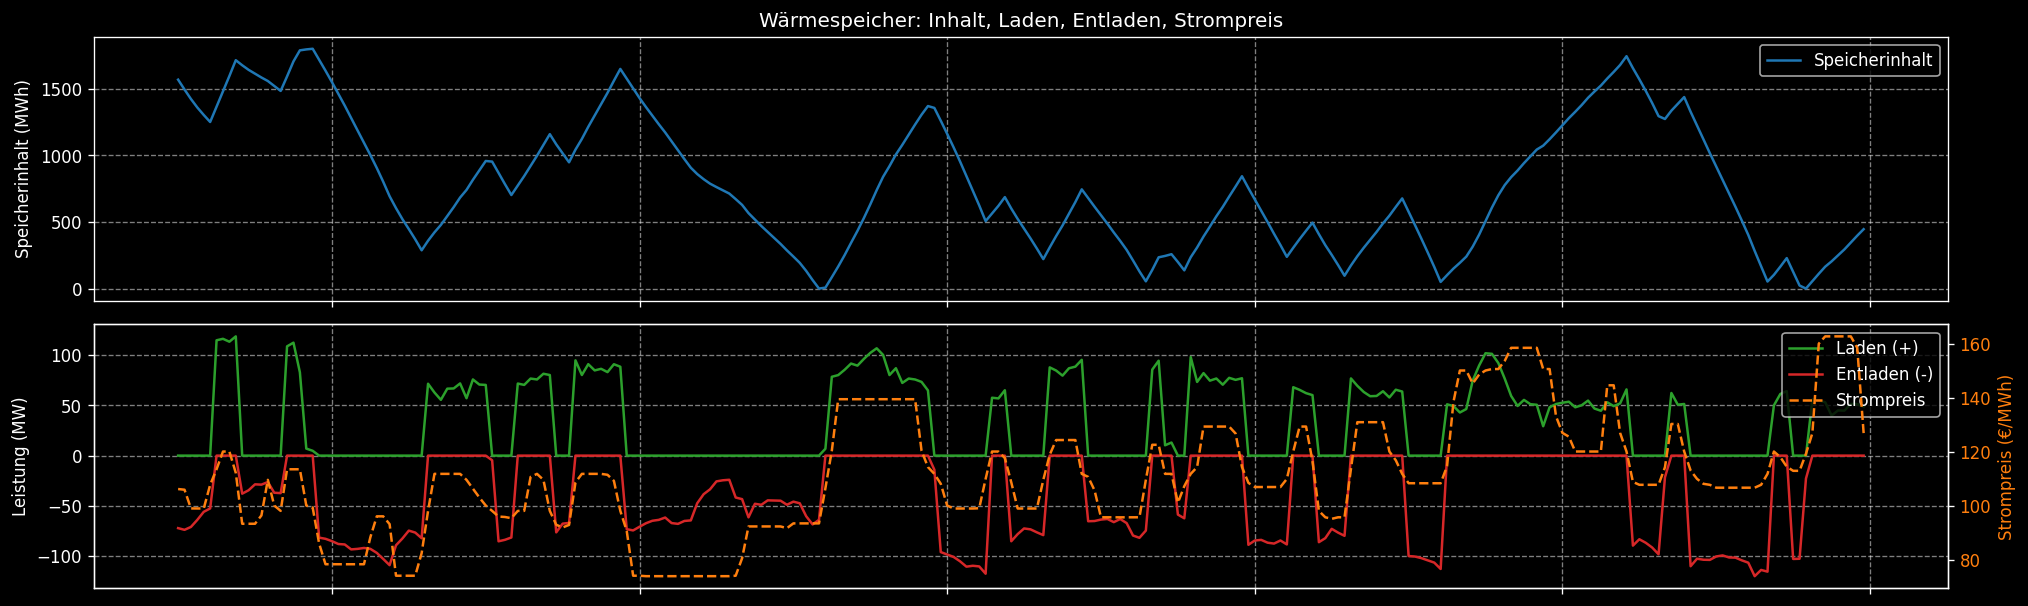

In [223]:
# --- Subplot für Speicherinhalte, Laden/Entladen und Strompreis ---

import matplotlib.pyplot as plt

# Daten laden
output_0h2 = scenario_uc1_0h2.load_output_data()
df = output_0h2[['heat_storage.heat_balance', 'heat_storage.heat_charging', 'heat_storage.heat_discharging', 'heat_storage.heat_content', 'heat_storage.bin_charge', 'heat_storage.bin_discharge', 'power_price']].copy()

# Zeitraum definieren (z.B. 1. bis 7. März 2030)
start = '2030-01-10'
end = '2030-01-20'

# DataFrame auf den Zeitraum filtern
df_week = df.loc[start:end]
df = df_week.copy()

# Entladen negativ machen
df['heat_storage.heat_discharging_neg'] = -df['heat_storage.heat_discharging']

# Subplots erzeugen
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(17, 7.5), sharex=True)

# 1. Subplot: Speicherinhalt
axes[0].plot(df.index, df['heat_storage.heat_content'], color='tab:blue', label='Speicherinhalt')
axes[0].set_ylabel('Speicherinhalt (MWh)')
axes[0].set_title('Wärmespeicher: Inhalt, Laden, Entladen, Strompreis')
axes[0].legend(loc='upper right')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2. Subplot: Laden (positiv), Entladen (negativ) und Strompreis (rechte Y-Achse)
ax2 = axes[1].twinx()
axes[1].plot(df.index, df['heat_storage.heat_charging'], color='tab:green', label='Laden (+)')
axes[1].plot(df.index, df['heat_storage.heat_discharging_neg'], color='tab:red', label='Entladen (-)')
axes[1].set_ylabel('Leistung (MW)')
axes[1].legend(loc='upper left')
axes[1].grid(True, linestyle='--', alpha=0.5)

ax2.plot(df.index, df['power_price'], color='tab:orange', label='Strompreis', linewidth=1.5, linestyle='--')
ax2.set_ylabel('Strompreis (€/MWh)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
lines1, labels1 = axes[1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[1].legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# 3. Subplot: leer
axes[2].set_visible(False)  # Optional: Subplot ausblenden, falls wirklich leer

plt.tight_layout()
plt.show()

## Nahwärmenetz Bilanz

✅ Step-Plot !!! Bei den anderen noch einfügen


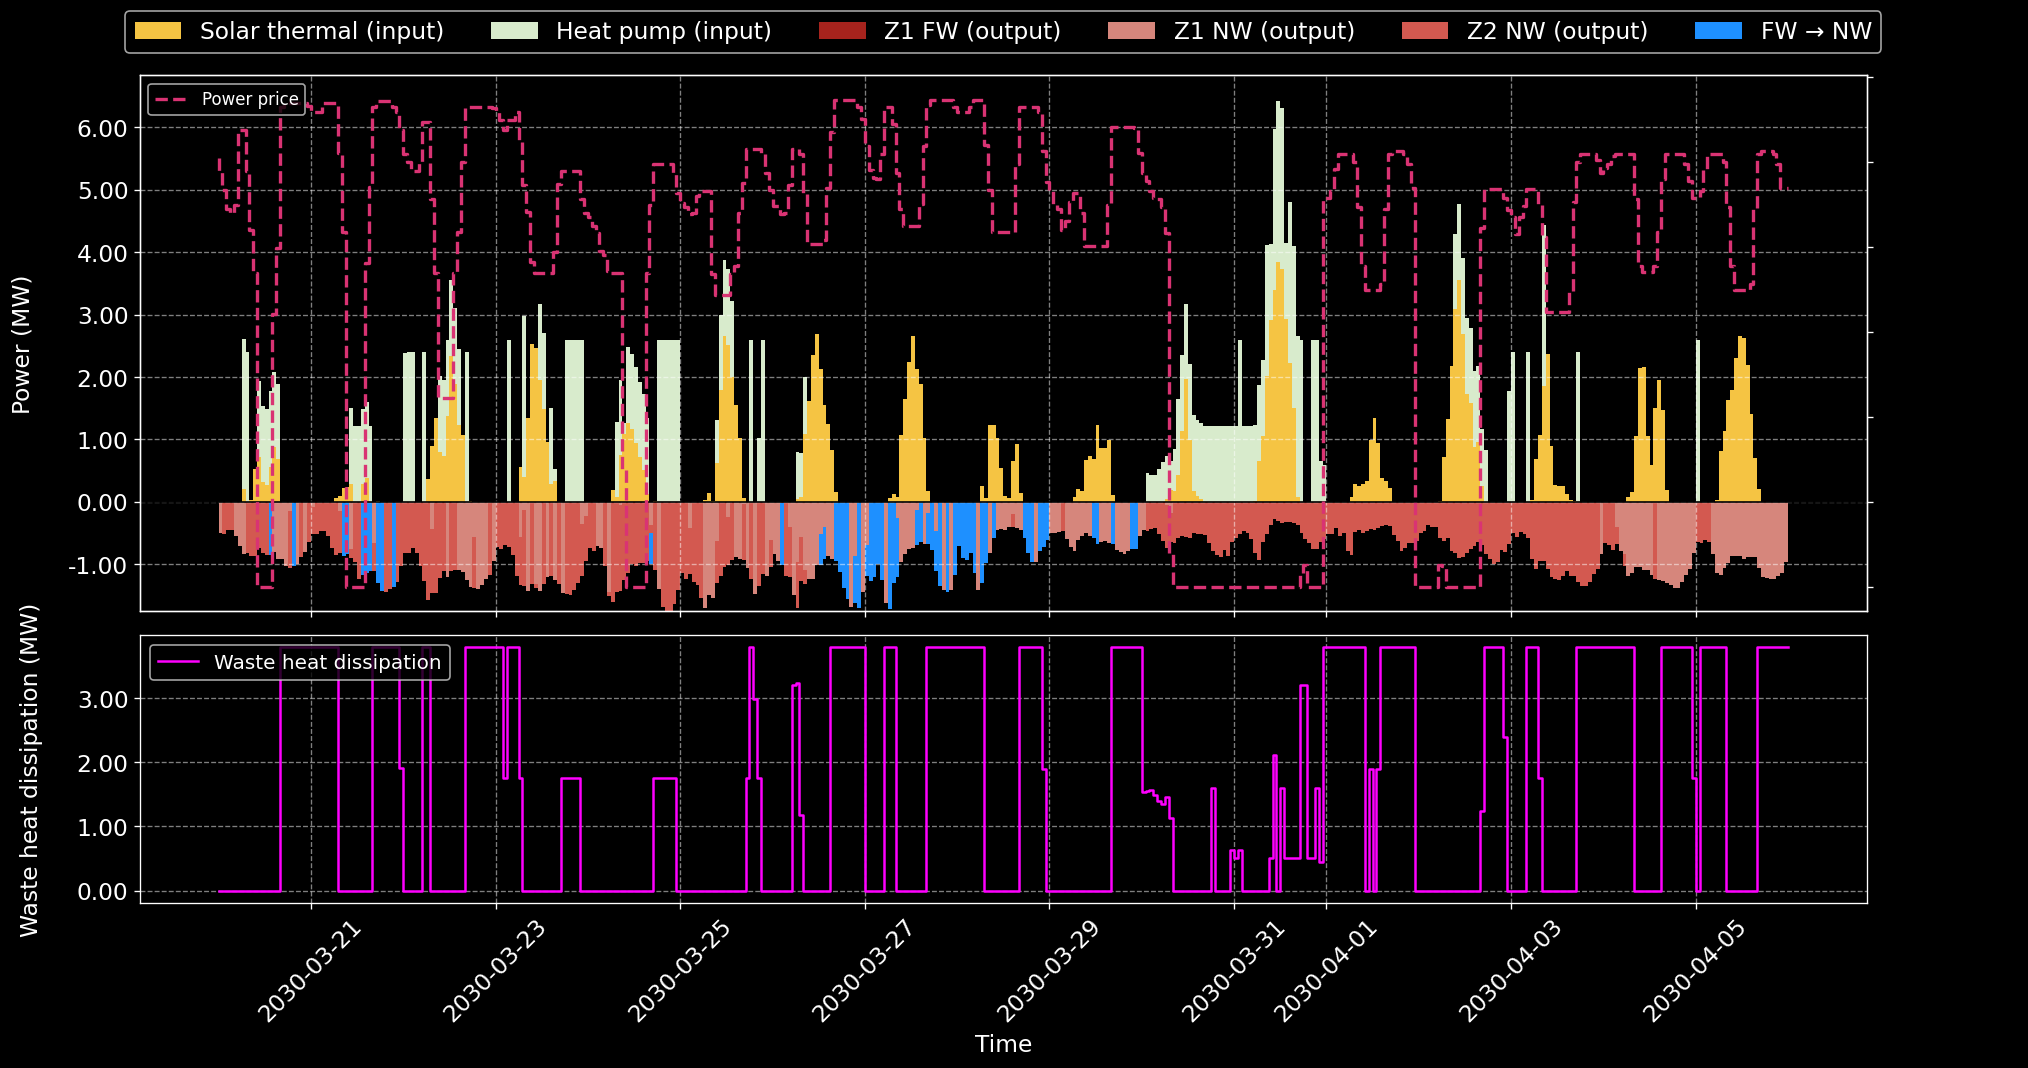

,t,gas_price,power_price,hydrogen_price,heat_demand,local_heat_demand,supply_temperature,return_temperature,solar_thermal_heat_profile,normalized_solar_thermal_heat_profile,...,heatpump_s1.real_cop,heatpump_s2.ideal_cop,heatpump_s2.d,heatpump_s2.real_cop,Q_dot_ST_in,Q_dot_WP_in,Q_dot_Z1_FW_out,Q_dot_Z1_NW_out,Q_dot_Z2_NW_out,FW_to_NW_out
datetime,,,,,,,,,,,,,,,,,,,,,
2030-03-20 00:00:00,1873,19.094,101.01,150.424838,98.6630,0.509875,76.760417,58.239583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-0.509875,-0.000000,-0.0
2030-03-20 01:00:00,1874,19.094,97.99,150.424838,107.1035,0.514996,76.760417,58.239583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-0.000000,-0.514996,-0.0
2030-03-20 02:00:00,1875,19.094,93.48,150.424838,113.1725,0.457788,76.760417,58.239583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-0.000000,-0.457788,-0.0
2030-03-20 03:00:00,1876,19.094,88.88,150.424838,116.8075,0.449192,76.760417,58.239583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-0.000000,-0.449192,-0.0
2030-03-20 04:00:00,1877,19.094,88.13,150.424838,118.4650,0.557151,76.760417,58.239583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-0.557151,-0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030-04-05 19:00:00,2276,17.246,102.59,135.866070,88.1220,1.239466,77.885417,57.114583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-1.239466,-0.000000,-0.0
2030-04-05 20:00:00,2277,17.246,102.59,135.866070,91.7850,1.243766,77.885417,57.114583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-1.243766,-0.000000,-0.0
2030-04-05 21:00:00,2278,17.246,102.03,135.866070,97.0960,1.196473,77.885417,57.114583,0.0,0.0,...,6.298512,5.969167,0.611932,3.652726,-0.0,0.0,-0.0,-1.196473,-0.000000,-0.0


In [224]:
import matplotlib.pyplot as plt
from matplotlib.dates import HourLocator, DateFormatter
import numpy as np

# --- MANUELLE Farbcodes für Inputs und Outputs ---
input_colors = [
    COLOR_DICT.get('solar_thermal', 'gold'),      # Solar thermal (input)
    COLOR_DICT.get('heatpump_s1', 'deepskyblue')  # Heat pump (input)
]
output_colors = [
    COLOR_DICT.get('stratified_storage.Q_dot_Z1_FW', 'indianred'),   # Z1 FW (output)
    COLOR_DICT.get('stratified_storage.Q_dot_Z1_NW', 'orange'),      # Z1 NW (output)
    COLOR_DICT.get('stratified_storage.Q_dot_Z2_NW', 'purple'),      # Z2 NW (output)
    COLOR_DICT.get('', 'dodgerblue')               # FW → NW (output)
]

color_power_price = COLOR_DICT.get('power_price', 'tab:red')

df = scenario_uc1_0h2.load_output_data()

# Zeitraum auswählen
start = '2030-03-20'
end = '2030-04-05'
df_period = df.loc[start:end].copy()

# Inputs (positiv, nur >0)
df_period['Q_dot_ST_in'] = df_period['stratified_storage.Q_dot_ST'].clip(lower=0)
df_period['Q_dot_WP_in'] = df_period['stratified_storage.Q_dot_WP'].clip(lower=0)

# Outputs (negativ, nur >0, dann als negative Werte)
df_period['Q_dot_Z1_FW_out'] = -df_period['stratified_storage.Q_dot_Z1_FW'].clip(lower=0)
df_period['Q_dot_Z1_NW_out'] = -df_period['stratified_storage.Q_dot_Z1_NW'].clip(lower=0)
df_period['Q_dot_Z2_NW_out'] = -df_period['stratified_storage.Q_dot_Z2_NW'].clip(lower=0)
if 'heat_grid.FW_to_NW' in df_period.columns:
    df_period['FW_to_NW_out'] = -df_period['heat_grid.FW_to_NW'].clip(lower=0)
else:
    df_period['FW_to_NW_out'] = 0

input_cols = ['Q_dot_ST_in', 'Q_dot_WP_in']
input_labels = ['Solar thermal (input)', 'Heat pump (input)']

output_cols = ['Q_dot_Z1_FW_out', 'Q_dot_Z1_NW_out', 'Q_dot_Z2_NW_out', 'FW_to_NW_out']
output_labels = ['Z1 FW (output)', 'Z1 NW (output)', 'Z2 NW (output)', 'FW → NW']

x = df_period.index

# Exakte Breite berechnen, sodass die Bars direkt aneinander liegen (ohne Lücke)
if len(x) > 1:
    bar_width = (x[1] - x[0]).total_seconds() / (60*60*24)
else:
    bar_width = 1  # Fallback

fig, axes = plt.subplots(
    nrows=2, ncols=1, dpi=120, figsize=(17, 9), sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

# 1. Subplot: Gestapelter Barplot (Inputs oben, Outputs unten, direkt aneinander)
ax = axes[0]

# Inputs (stacked, positiv)
bottom = np.zeros(len(df_period))
input_handles = []
for i, col in enumerate(input_cols):
    y = df_period[col].values
    bar = ax.bar(x, y, width=bar_width, bottom=bottom, color=input_colors[i], label=input_labels[i], align='edge', edgecolor='none')
    input_handles.append(bar)
    bottom += y

# Outputs (stacked, negativ)
bottom = np.zeros(len(df_period))
output_handles = []
for i, col in enumerate(output_cols):
    y = df_period[col].values
    bar = ax.bar(x, y, width=bar_width, bottom=bottom, color=output_colors[i], label=output_labels[i], align='edge', edgecolor='none')
    output_handles.append(bar)
    bottom += y

ax.axhline(0, color='black', linewidth=1)
ax.set_ylabel('Power (MW)', fontsize=14, labelpad=20, loc='center')

# Strompreis auf zweiter Y-Achse
ax1b = ax.twinx()

# x für Stepplot verlängern, damit der letzte Step vollständig ist
if len(x) > 1:
    delta = x[-1] - x[-2]
    x_last = x[-1] + delta
else:
    # Fallback: 1 Stunde als pd.Timedelta
    x_last = x[-1] + pd.Timedelta(hours=1)

# x als numpy array mit dtype='datetime64[ns]' für matplotlib
x_step = np.append(np.array(x, dtype='datetime64[ns]'), np.array([x_last], dtype='datetime64[ns]'))
y_step = np.append(df_period['power_price'].values, df_period['power_price'].values[-1])

line_power_price, = ax1b.step(x_step, y_step, where='pre', color=color_power_price, linestyle='--', linewidth=2, label='Power price')
ax1b.set_ylabel('Power price (€/MWh)', color='black', fontsize=14, labelpad=20, loc='center')
ax1b.tick_params(axis='y', labelcolor='black', labelsize=14)

# Legenden
handles = [h[0] for h in input_handles + output_handles]
labels = input_labels + output_labels
ax.legend(
    handles,
    labels,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02, 0, 0),
    ncol=6,
    frameon=True,
    fontsize=14
)
ax1b.legend([line_power_price], ['Power price'], loc='upper left', fontsize=10, frameon=True)

ax.grid(True, linestyle='--', alpha=0.5)
ax.tick_params(axis='x', labelrotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# 2. Subplot: waste_heat_grid.heat_dissipation
if 'waste_heat_grid.heat_dissipation' in df_period.columns:
    # x für Stepplot verlängern, damit der letzte Step vollständig ist
    if len(x) > 1:
        delta = x[-1] - x[-2]
        x_last = x[-1] + delta
    else:
        x_last = x[-1] + pd.Timedelta(hours=1)
    x_step2 = np.append(np.array(x, dtype='datetime64[ns]'), np.array([x_last], dtype='datetime64[ns]'))
    y_step2 = np.append(df_period['waste_heat_grid.heat_dissipation'].values, df_period['waste_heat_grid.heat_dissipation'].values[-1])
    axes[1].step(x_step2, y_step2, where='pre', color='magenta', label='Waste heat dissipation')
    axes[1].set_ylabel('Waste heat dissipation (MW)', fontsize=14, labelpad=20, loc='center')
    axes[1].set_xlabel('Time', fontsize=14)
    axes[1].legend(loc='upper left', fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.5)
else:
    axes[1].text(0.5, 0.5, 'Column waste_heat_grid.heat_dissipation not found', ha='center', va='center', fontsize=12)
    axes[1].axis('off')
axes[1].tick_params(axis='x', labelrotation=45, labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

# Gleitkommazahlen für Y-Achsen-Ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
ax1b.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))

plt.tight_layout()
plt.show()

df_period

## Abwärme und Wärmepumpen als Funktion des Strompreises

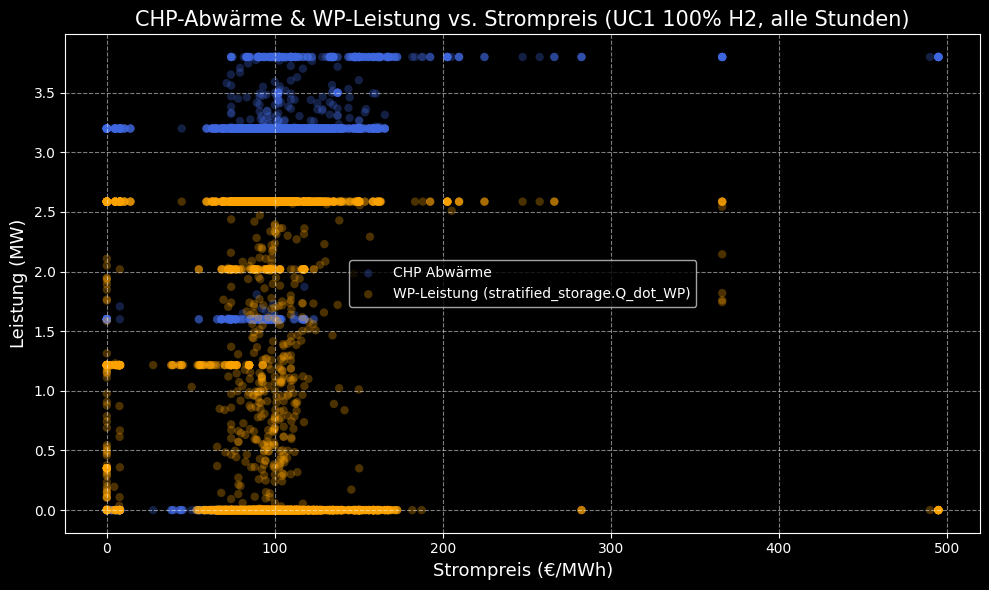

In [225]:
import matplotlib.pyplot as plt

# Daten laden
df = scenario_uc1_100h2.load_output_data()

# Überprüfen, ob alle benötigten Spalten vorhanden sind
required_cols = ['chp_1.waste_heat', 'chp_2.waste_heat', 'power_price', 'stratified_storage.Q_dot_WP']
if all(col in df.columns for col in required_cols):
    # Neue Spalte für die Summe der Abwärme beider CHP
    df['chp.waste_heat'] = df['chp_1.waste_heat'] + df['chp_2.waste_heat']

    plt.figure(figsize=(10, 6))
    # CHP-Abwärme vs. Strompreis
    plt.scatter(df['power_price'], df['chp.waste_heat'], alpha=0.3, color='royalblue', edgecolor='none', label='CHP Abwärme')
    # Wärmepumpenleistung vs. Strompreis
    plt.scatter(df['power_price'], df['stratified_storage.Q_dot_WP'], alpha=0.3, color='orange', edgecolor='none', label='WP-Leistung (stratified_storage.Q_dot_WP)')

    plt.xlabel('Strompreis (€/MWh)', fontsize=13)
    plt.ylabel('Leistung (MW)', fontsize=13)
    plt.title('CHP-Abwärme & WP-Leistung vs. Strompreis (UC1 100% H2, alle Stunden)', fontsize=15)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Mindestens eine der benötigten Spalten fehlt in den Daten:", required_cols)